# Business Case:

Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model in such a way that the objective is to predict the ordinal variable “damage_grade”. This column presents the level of damage grade affected by the earthquake.

Task3:-Suggestions to the Seismologists to avoid  earthquake event leading  to significant damage in many buildings


In [1]:
# Importing Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the DataFrame
data = pd.read_csv('train_values.csv')

In [3]:
# Loading the Trained Labels
data1 = pd.read_csv('train_labels.csv')

In [4]:
# To display all the columns
pd.set_option('display.max_columns',None)

In [5]:
data.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type roof_type ground_floor_type  \
0                      t               r         n                 f   
1                      o               r         n                 x   
2                      t               r         n                 f   
3                      t               r         n                 f   
4                      t               r         n                 f   

  other_floor_type position plan_configuration  has_superstructure_adobe_mud  \
0                q        t                  d                             1   
1                q        s                  d                             0   
2                x        t                  d                             0   
3                x        s                  d                             0   
4                x        s                  d                             1   

   has_superstructure_mud_mortar_stone  has_superstructure_stone_flag  \
0                                    1                              0   
1                                    1                              0   
2                                    1                              0   
3                                    1                              0   
4                                    0                              0   

   has_superstructure_cement_mortar_stone  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   has_superstructure_mud_mortar_brick  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   has_superstructure_cement_mortar_brick  has_superstructure_timber  \
0                                       0                          0   
1                                       0                          0   
2                                       0                          0   
3                                       0                          1   
4                                       0                          0   

   has_superstructure_bamboo  has_superstructure_rc_non_engineered  \
0                          0                                     0   
1                          0                                     0   
2                          0                                     0   
3                          1                                     0   
4                          0                                     0   

   has_superstructure_rc_engineered  has_superstructure_other  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   

  legal_ownership_status  count_families  has_secondary_use  \
0                 

In [6]:
data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [12]:
data1.head()

building_id  damage_grade
0       802906             3
1        28830             2
2        94947             3
3       590882             2
4       201944             3

In [9]:
# Combining the Labels to our original dataframe
data['damage_grade'] = data1['damage_grade']

# Domain Analysis.

1. **building_id**: This is a unique identifier for each building in the dataset. It helps distinguish between different buildings and serves as a primary key for data retrieval and analysis.

2. **geo_level_1_id, geo_level_2_id, geo_level_3_id**: These represent the geographic hierarchy of the building's location, ranging from the largest region (level 1) to the most specific sub-region (level 3). Understanding the geographical distribution can reveal patterns in earthquake susceptibility and aid in disaster preparedness planning.

3. **count_floors_pre_eq**: This attribute indicates the number of floors in the building before the earthquake. It influences the building's structural stability and vulnerability to collapse during seismic events.

4. **age**: The age of the building in years provides insights into its structural integrity and maintenance history. Older buildings may be more susceptible to earthquake damage due to deterioration and outdated construction standards.

5. **area_percentage, height_percentage**: These attributes provide normalized measurements of the building's footprint area and height. They help assess the building's structural proportions and potential risk factors during seismic activity.

6. **land_surface_condition**: Describes the condition of the land where the building is situated, such as normal, soft, or other. Different surface conditions can affect soil stability and building resilience to earthquakes.

7. **foundation_type**: Indicates the type of foundation used for the building's construction, which impacts its stability and resistance to ground motion.

8. **roof_type, ground_floor_type, other_floor_type**: These attributes specify the types of roof, ground floor, and other floors in the building. Each component contributes to the building's overall structural integrity and may exhibit varying vulnerabilities during earthquakes.

9. **position**: Describes the building's position relative to neighboring structures (e.g., attached on one side, standalone). It influences the building's response to seismic forces and potential damage propagation.

10. **plan_configuration**: Represents the layout or configuration of the building's plan, which can affect its seismic performance. Different configurations may exhibit distinct vulnerabilities to earthquake-induced stresses.

11. **has_superstructure_***: Binary flags indicating the presence of various superstructure types, such as adobe mud, mud mortar-stone, timber, etc. These features contribute to the building's overall structural composition and seismic resistance.

12. **legal_ownership_status**: Indicates the legal ownership status of the land where the building is located, which may impact maintenance practices, building codes compliance, and disaster preparedness efforts.

13. **count_families**: The number of families residing in the building reflects its occupancy level and potential human impact during seismic events.

14. **has_secondary_use_***: Binary indicators of secondary uses for the building, such as agriculture, hotels, rentals, etc. These secondary uses may introduce additional vulnerabilities or structural demands during earthquakes.


16. **has_secondary_use**: Indicates if the building is used for any secondary purpose. This binary attribute provides insight into whether the building serves functions beyond its primary use, which may impact its structural integrity and vulnerability during earthquakes.

17. **has_secondary_use_agriculture, has_secondary_use_hotel, has_secondary_use_rental, has_secondary_use_institution, has_secondary_use_school, has_secondary_use_industry, has_secondary_use_health_post, has_secondary_use_gov_office, has_secondary_use_use_police, has_secondary_use_other**: These binary attributes specify different secondary uses of the building, including agriculture, hotel, rental, institutional, educational, industrial, health post, government office, police station, and other purposes. Identifying secondary uses helps assess additional risk factors and occupancy patterns that could affect earthquake damage.

18. **has_superstructure_adobe_mud, has_superstructure_mud_mortar_stone, has_superstructure_stone_flag, has_superstructure_cement_mortar_stone, has_superstructure_mud_mortar_brick, has_superstructure_cement_mortar_brick, has_superstructure_timber, has_superstructure_bamboo, has_superstructure_rc_non_engineered, has_superstructure_rc_engineered, has_superstructure_other**: These binary attributes indicate the presence or absence of various types of superstructures in the building, such as adobe/mud, mud mortar-stone, stone, cement mortar-stone, mud mortar-brick, cement mortar-brick, timber, bamboo, non-engineered reinforced concrete, engineered reinforced concrete, and other materials. Understanding the composition of superstructures helps assess the building's structural characteristics and vulnerability to seismic events.

19. **damage_grade**: The target variable representing the level of damage to the building caused by the earthquake. It is an ordinal variable with three categories: low damage, medium damage, and high damage. Predicting damage grade is the main objective of the project and requires analyzing the relationships between building attributes and damage severity.

These attributes collectively provide comprehensive information about the buildings in the dataset, including their structural characteristics, usage patterns, and vulnerability to earthquake damage. Analyzing these attributes can help identify factors contributing to building resilience or susceptibility and inform strategies for mitigating seismic risk.

## Basic checks

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [15]:
data1.head()

building_id  damage_grade
0       802906             3
1        28830             2
2        94947             3
3       590882             2
4       201944             3

In [16]:
data.shape

(260601, 40)

In [17]:
# Iterate over each column in the 'data' DataFrame
for column in data:
    # Get the unique values of the current column
    x = data[column].unique()
    y = column
    print(y)
    print(x)

building_id
[802906  28830  94947 ... 602512 151409 747594]
geo_level_1_id
[ 6  8 21 22 11  9 20  0 26 17 12 18  4 27 25 10  7  3 13 30 16  5 15 14
 19  1 24 28 23  2 29]
geo_level_2_id
[487 900 363 ...  77 115 627]
geo_level_3_id
[12198  2812  8973 ...  3152  5276  3085]
count_floors_pre_eq
[2 3 1 4 5 6 7 8 9]
age
[ 30  10  25   0  15  20  45  55   5  40  80  60  35  70  50  65 100  75
  85 190 995 105  90 120  95 110 115 150 200 130 125 140 155 160 175 135
 145 195 180 165 170 185]
area_percentage
[  6   8   5   9   3  13   7   4  12  16  11  27  10  15  14  17  21  37
  19   2  28  38  56   1  20  24  34  26  18  31  25  23  22  32  47  36
  40  29  42  55  35  39 100  50  51  43  30  62  85  33  45  52  57  49
  67  66  54  75  65  58  48  64  63  46  59  86  78  41  44  61  70  77
  73  72  53  60  84  83  76  96  80  90  82  69]
height_percentage
[ 5  7  9  4  6  3 10  8  2 32 12 11 13 16 15 18 26 17 19 14 20 23 21 25
 24 28 31]
land_surface_condition
['t' 'o' 'n']
foundation_typ

In [18]:
# Checking for null values.
data.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [19]:
data.describe()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
count  2.606010e+05   260601.000000   260601.000000   260601.000000   
mean   5.256755e+05       13.900353      701.074685     6257.876148   
std    3.045450e+05        8.033617      412.710734     3646.369645   
min    4.000000e+00        0.000000        0.000000        0.000000   
25%    2.611900e+05        7.000000      350.000000     3073.000000   
50%    5.257570e+05       12.000000      702.000000     6270.000000   
75%    7.897620e+05       21.000000     1050.000000     9412.000000   
max    1.052934e+06       30.000000     1427.000000    12567.000000   

       count_floors_pre_eq            age  area_percentage  height_percentage  \
count        260601.000000  260601.000000    260601.000000      260601.000000   
mean              2.129723      26.535029         8.018051           5.434365   
std               0.727665      73.565937         4.392231           1.918418   
min               1.000000       0.000000         1.000000           2.000000   
25%               2.000000      10.000000         5.000000           4.000000   
50%               2.000000      15.000000         7.000000           5.000000   
75%               2.000000      30.000000         9.000000           6.000000   
max               9.000000     995.000000       100.000000          32.000000   

       has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
count                 260601.000000                        260601.000000   
mean                       0.088645                             0.761935   
std                        0.284231                             0.425900   
min                        0.000000                             0.000000   
25%                        0.000000                             1.000000   
50%                        0.000000                             1.000000   
75%                        0.000000                             1.000000   
max                        1.000000                             1.000000   

       has_superstructure_stone_flag  has_superstructure_cement_mortar_stone  \
count                  260601.000000                           260601.000000   
mean                        0.034332                                0.018235   
std                         0.182081                                0.133800   
min                         0.000000                                0.000000   
25%                         0.000000                                0.000000   
50%                         0.000000                                0.000000   
75%                         0.000000                                0.000000   
max                         1.000000                                1.000000   

       has_superstructure_mud_mortar_brick  \
count                        260601.000000   
mean                              0.068154   
std                               0.252010   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                               1.000000   

       has_superstructure_cement_mortar_brick  has_superstructure_timber  \
count                           260601.000000              260601.000000   
mean                                 0.075268                   0.254988   
std                                  0.263824                   0.435855   
min                                  0.000000                   0.000000   
25%                                  0.000000                   0.000000   
50%                                  0.000000                   0.000000   
75%                                  0.000000                   1.000000   
max                                  1.000000                   1.000000   

       has_superstructure_bamboo  has_superstructure_rc_non_engineered  \
count              260601.000000                         2

In [20]:
data.describe(include='O')

land_surface_condition foundation_type roof_type ground_floor_type  \
count                  260601          260601    260601            260601   
unique                      3               5         3                 5   
top                         t               r         n                 f   
freq                   216757          219196    182842            209619   

       other_floor_type position plan_configuration legal_ownership_status  
count            260601   260601             260601                 260601  
unique                4        4                 10                      4  
top                   q        s                  d                      v  
freq             165282   202090             250072                 250939

In [21]:
data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [22]:
data.shape

(260601, 40)

# Exploratory Data Analysis

## Univariate Analysis

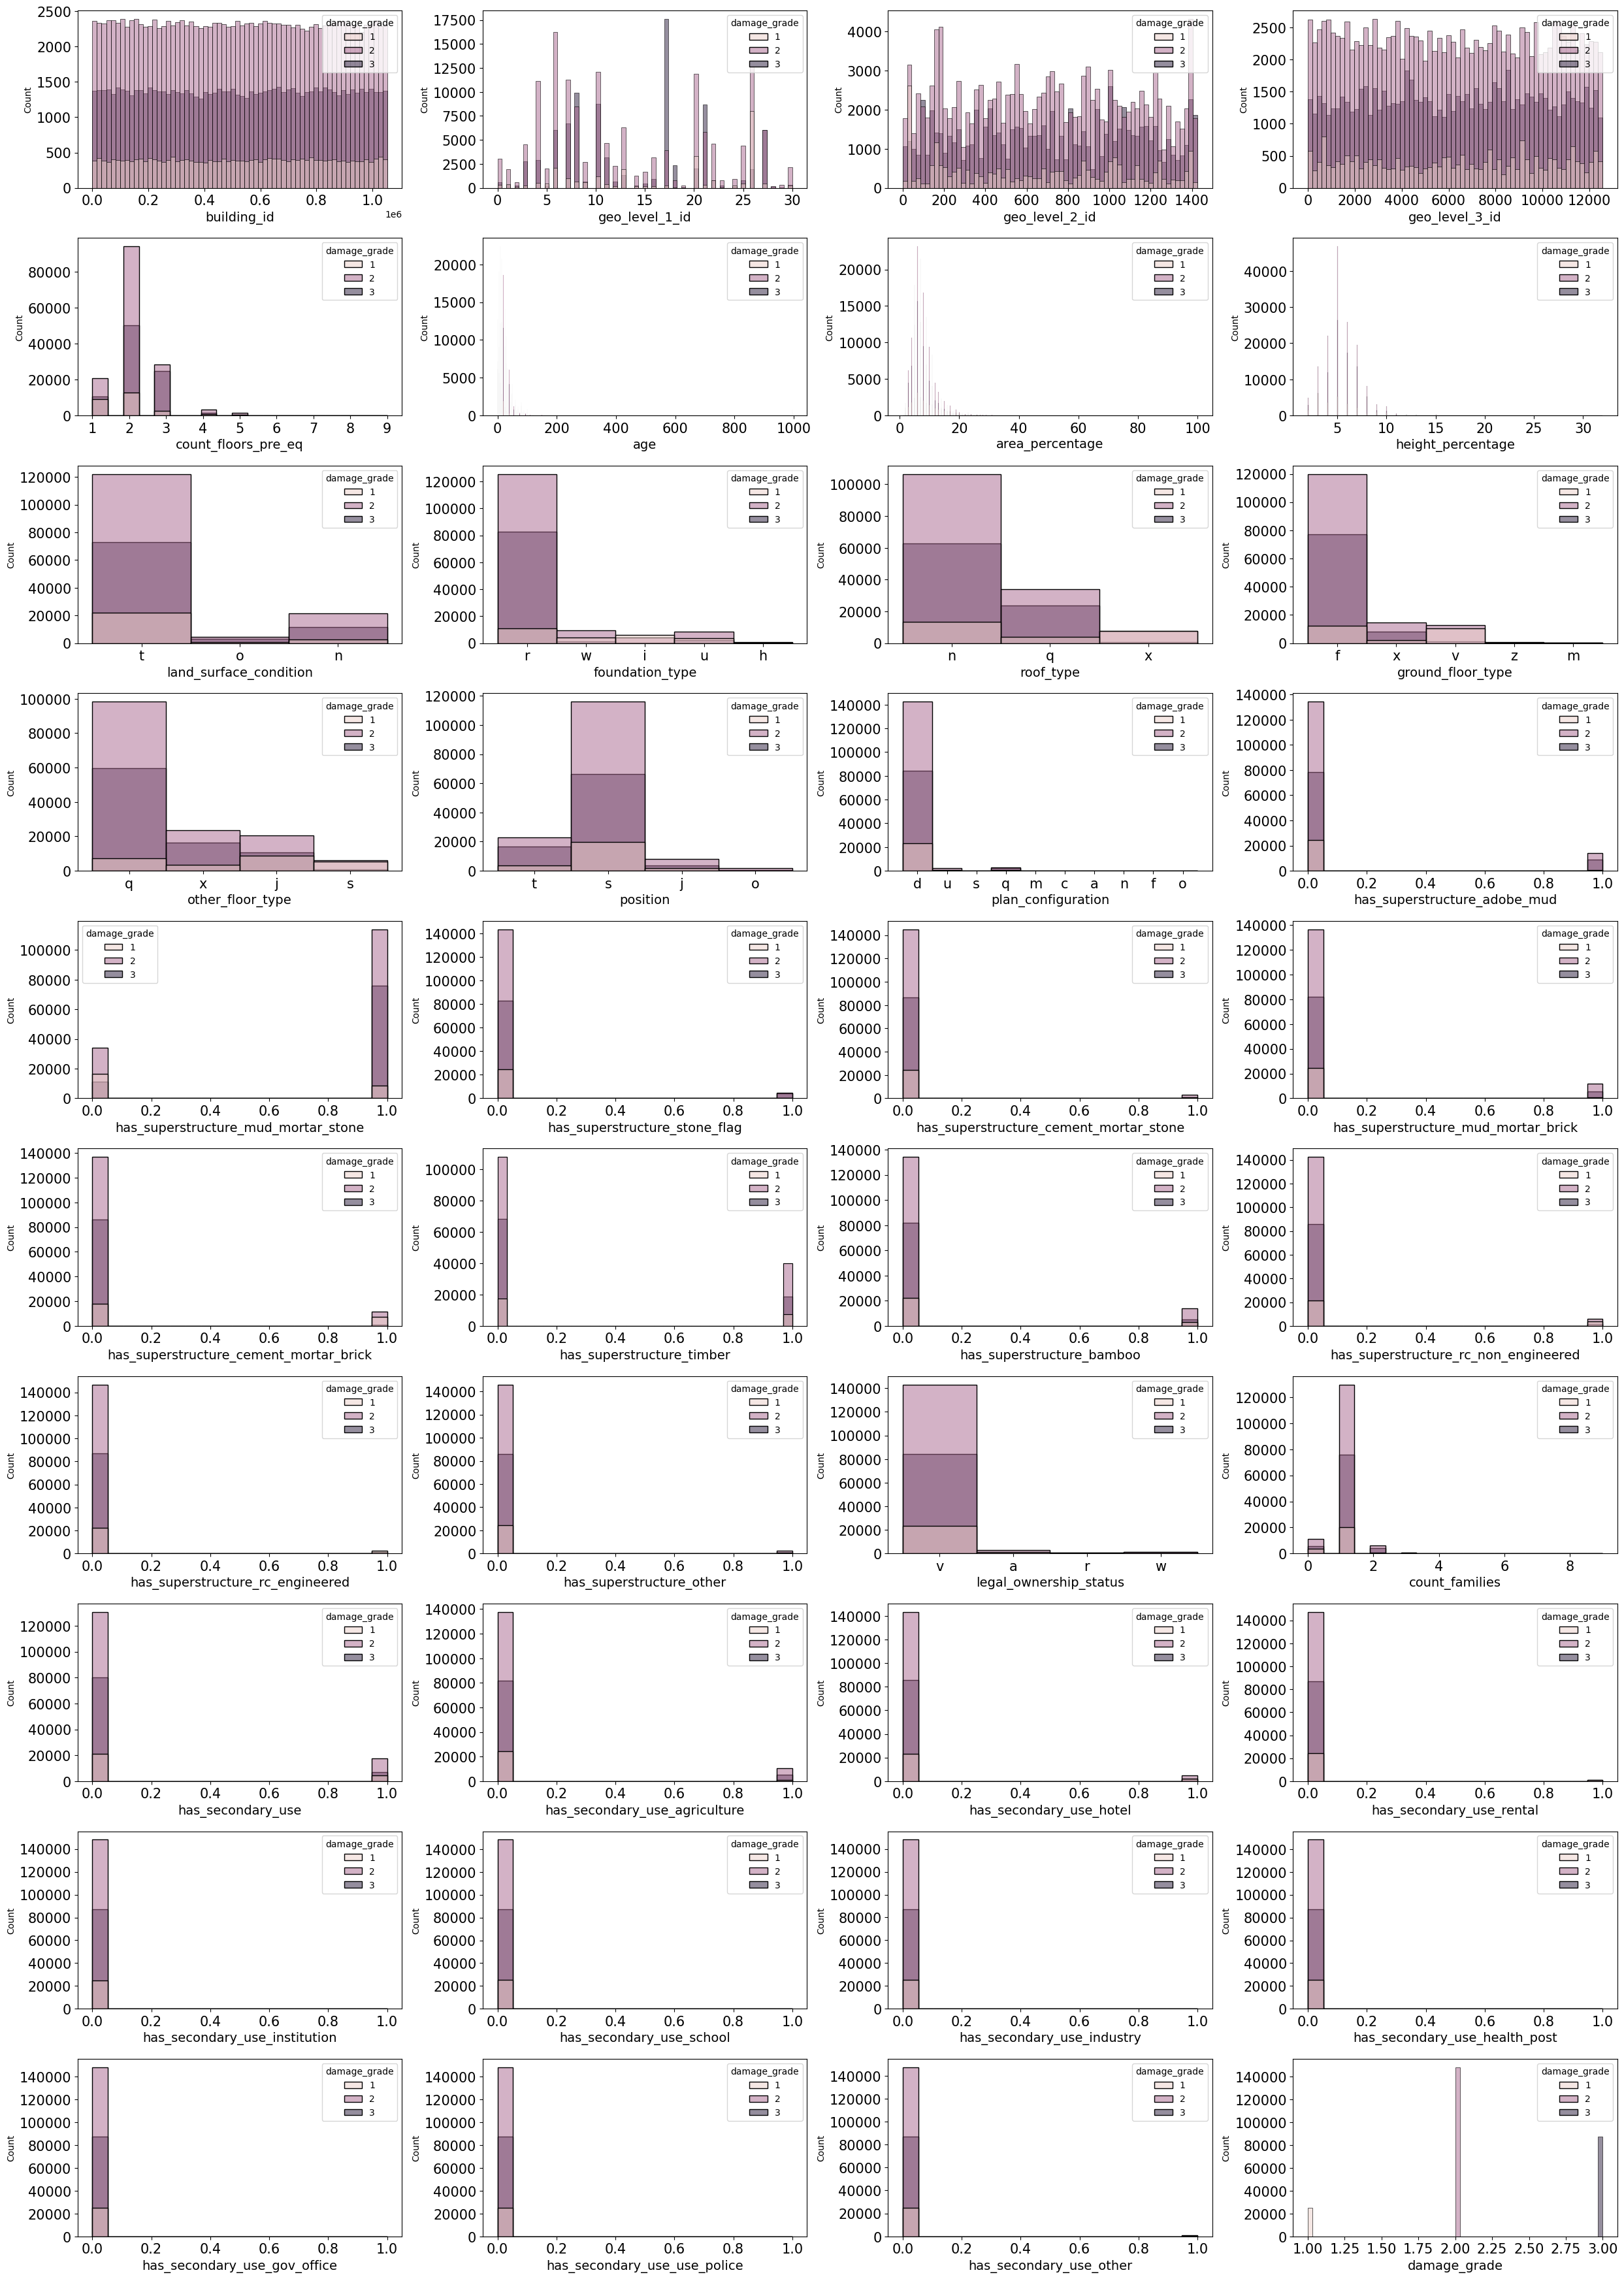

In [23]:
plt.figure(figsize=(25,35))
plotnumber = 1

for column in data:
    ax = plt.subplot(10,4,plotnumber)
    sns.histplot(x = column,data=data,hue=data['damage_grade'])
    plt.xlabel(column,fontsize=14)
    plt.ylabel('Count',fontsize=10)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

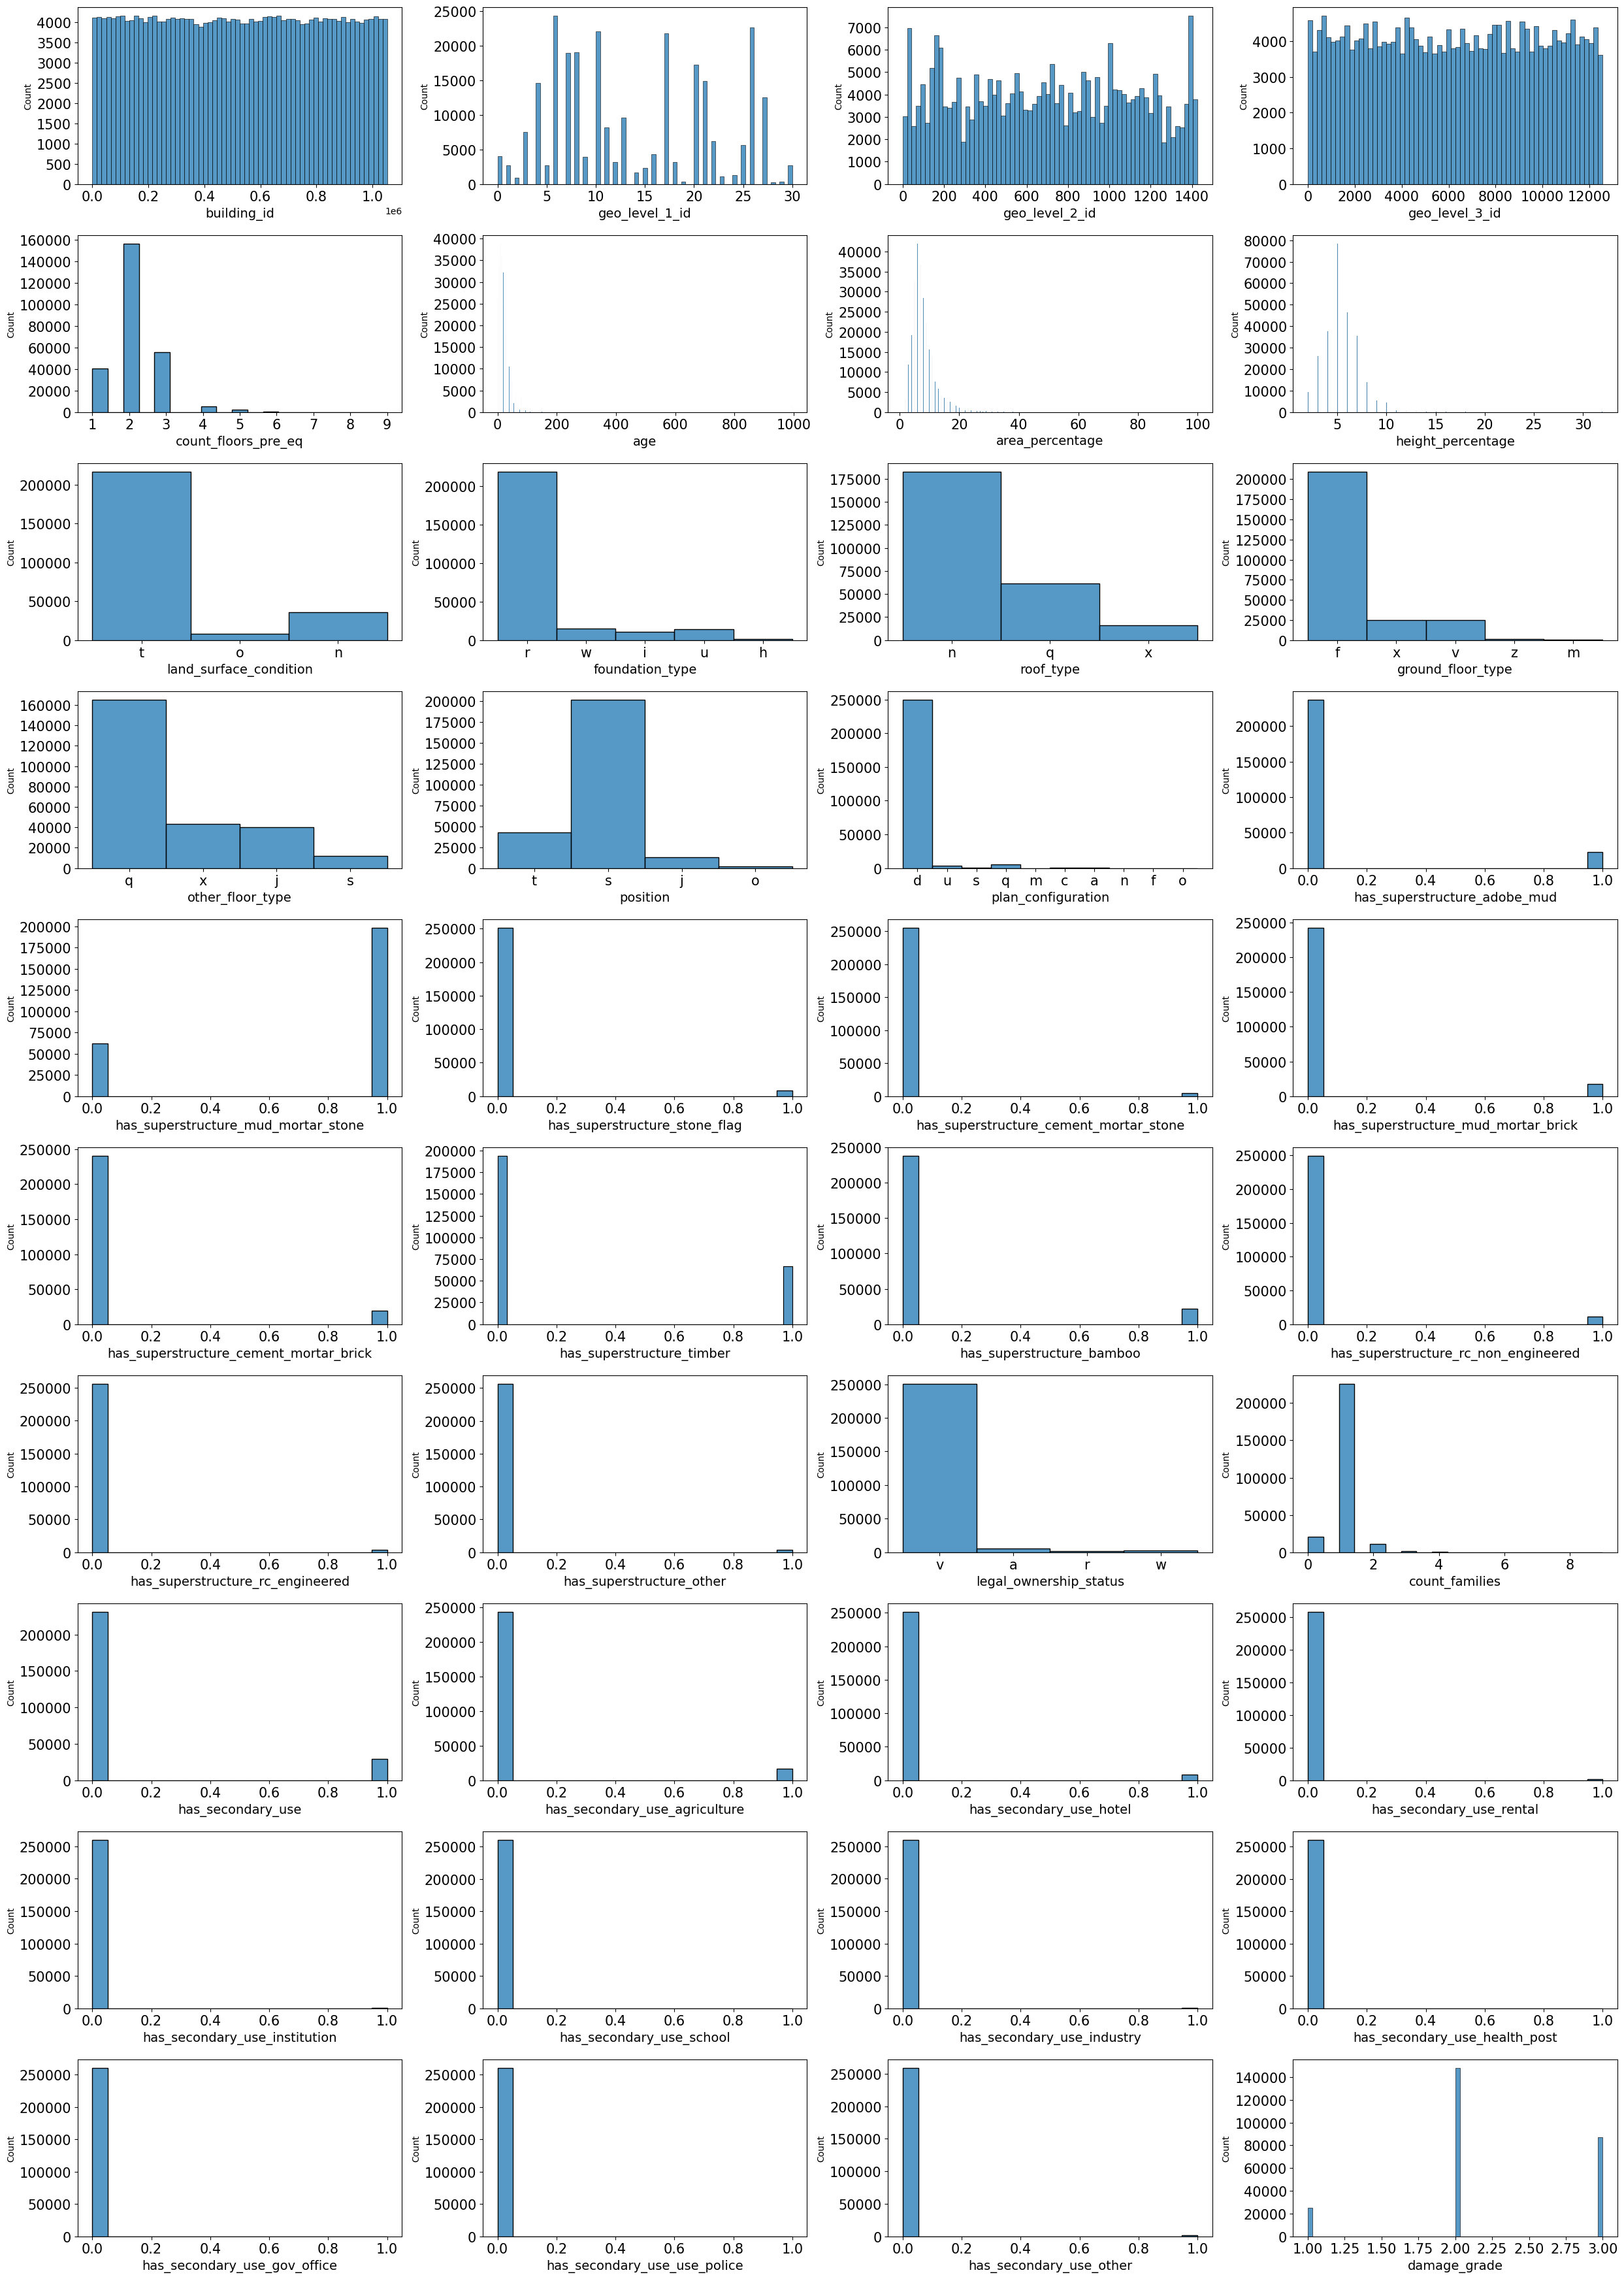

In [24]:
plt.figure(figsize=(25,35))
plotnumber = 1

for column in data:
    ax = plt.subplot(10,4,plotnumber)
    sns.histplot(x = column,data=data)
    plt.xlabel(column,fontsize=14)
    plt.ylabel('Count',fontsize=10)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

**Insights form Univariate Analysis**

1. The distribution of none of the graphs follows a normal distribution pattern.

2. The 'land_surface_condition' attribute has a higher frequency of records associated with the condition represented by 't'.

3. Similarly, the 'foundation_type' attribute has a higher frequency of records associated with the type represented by 'r'.

4. The 'roof_type' attribute predominantly contains records associated with the type represented by 'n'.

5. The 'ground_floor_type' attribute is primarily populated with records associated with the type represented by 'f'.

6. Similarly, the 'position' attribute has a higher frequency of records associated with the position represented by 's'.

7. The 'other_floor_type' attribute is predominantly populated with records associated with the type represented by 'q'.

8. The attributes 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', and 'has_secondary_use_other' all contain binary values (0 and 1), with the majority of records having a value of 1. There are only a few or negligible records where the value is 0.

9. In the graph showing 'damage_grade,' we can easily notice that some levels of damage are much more common than others. This means the dataset is imbalanced because certain types of damage occur much more frequently than others. 

10. This imbalance could affect how well our models work, so we need to be careful when building and evaluating them.

## Bivariate Analysis

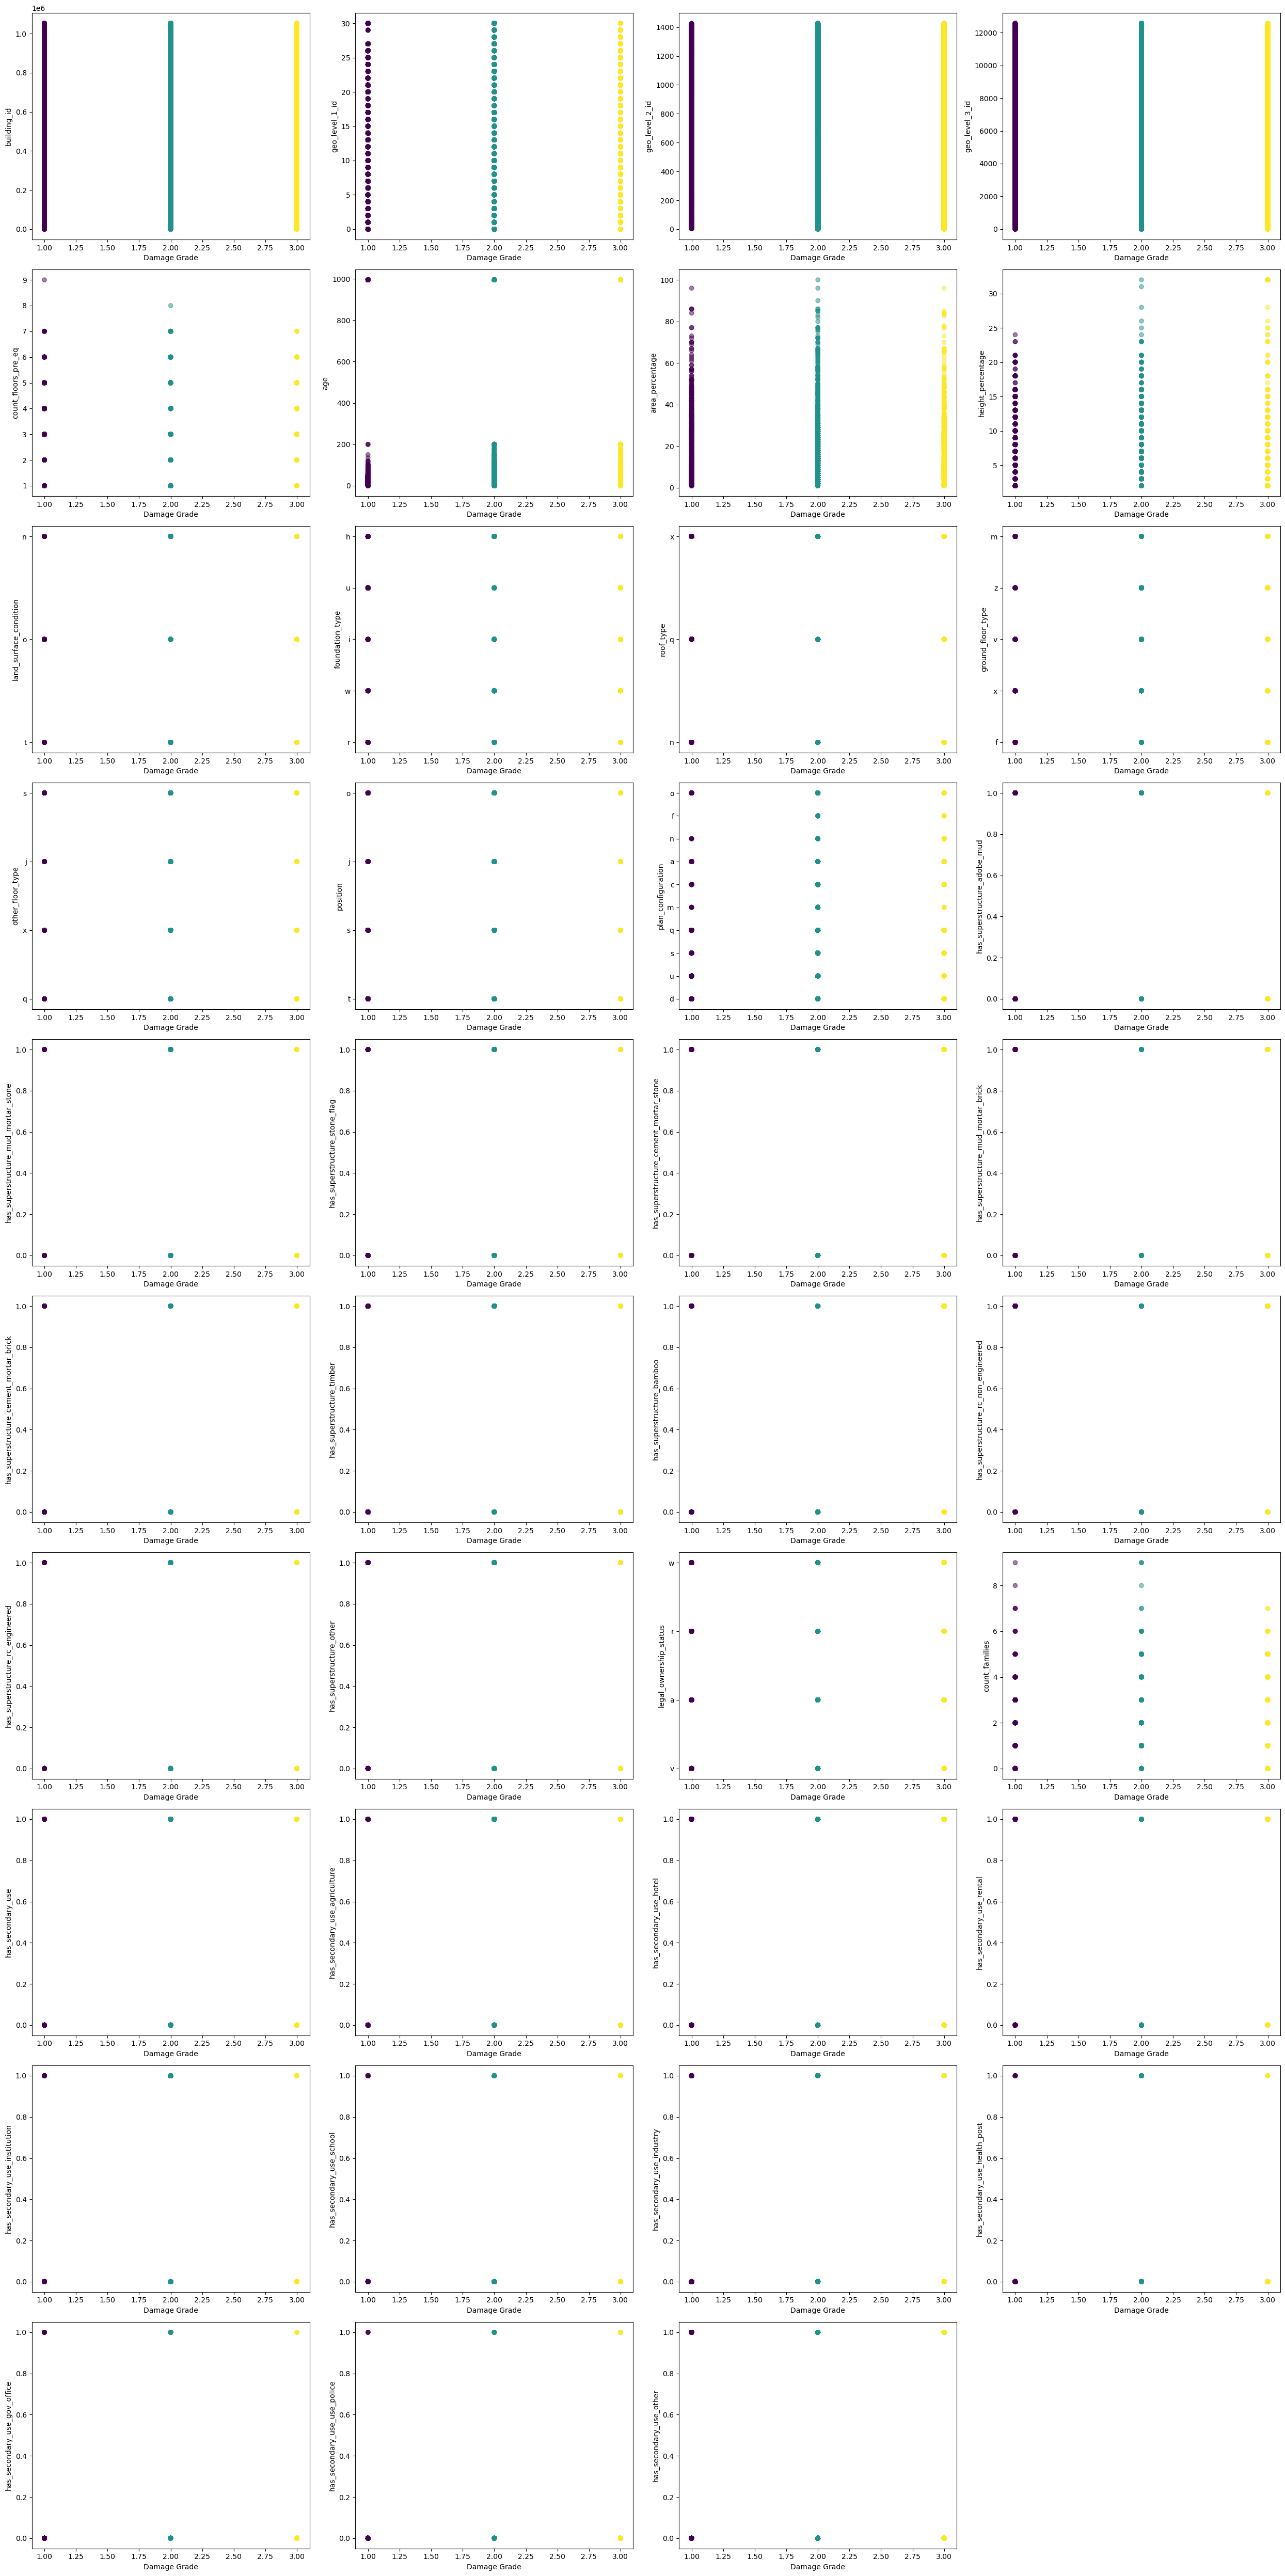

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 50))
plot_number = 1

for column in data.drop(columns=['damage_grade']):  # Exclude the target column 'damage_grade'
    plt.subplot(10, 4, plot_number)
    plt.scatter(x=data['damage_grade'], y=data[column], c=data['damage_grade'], cmap='viridis', alpha=0.5)
    plt.xlabel('Damage Grade')
    plt.ylabel(column)
    plot_number += 1

plt.tight_layout()
plt.show()


**The scatter plot is challenging to interpret due to the large volume of data, comprising 260,000+ records.**

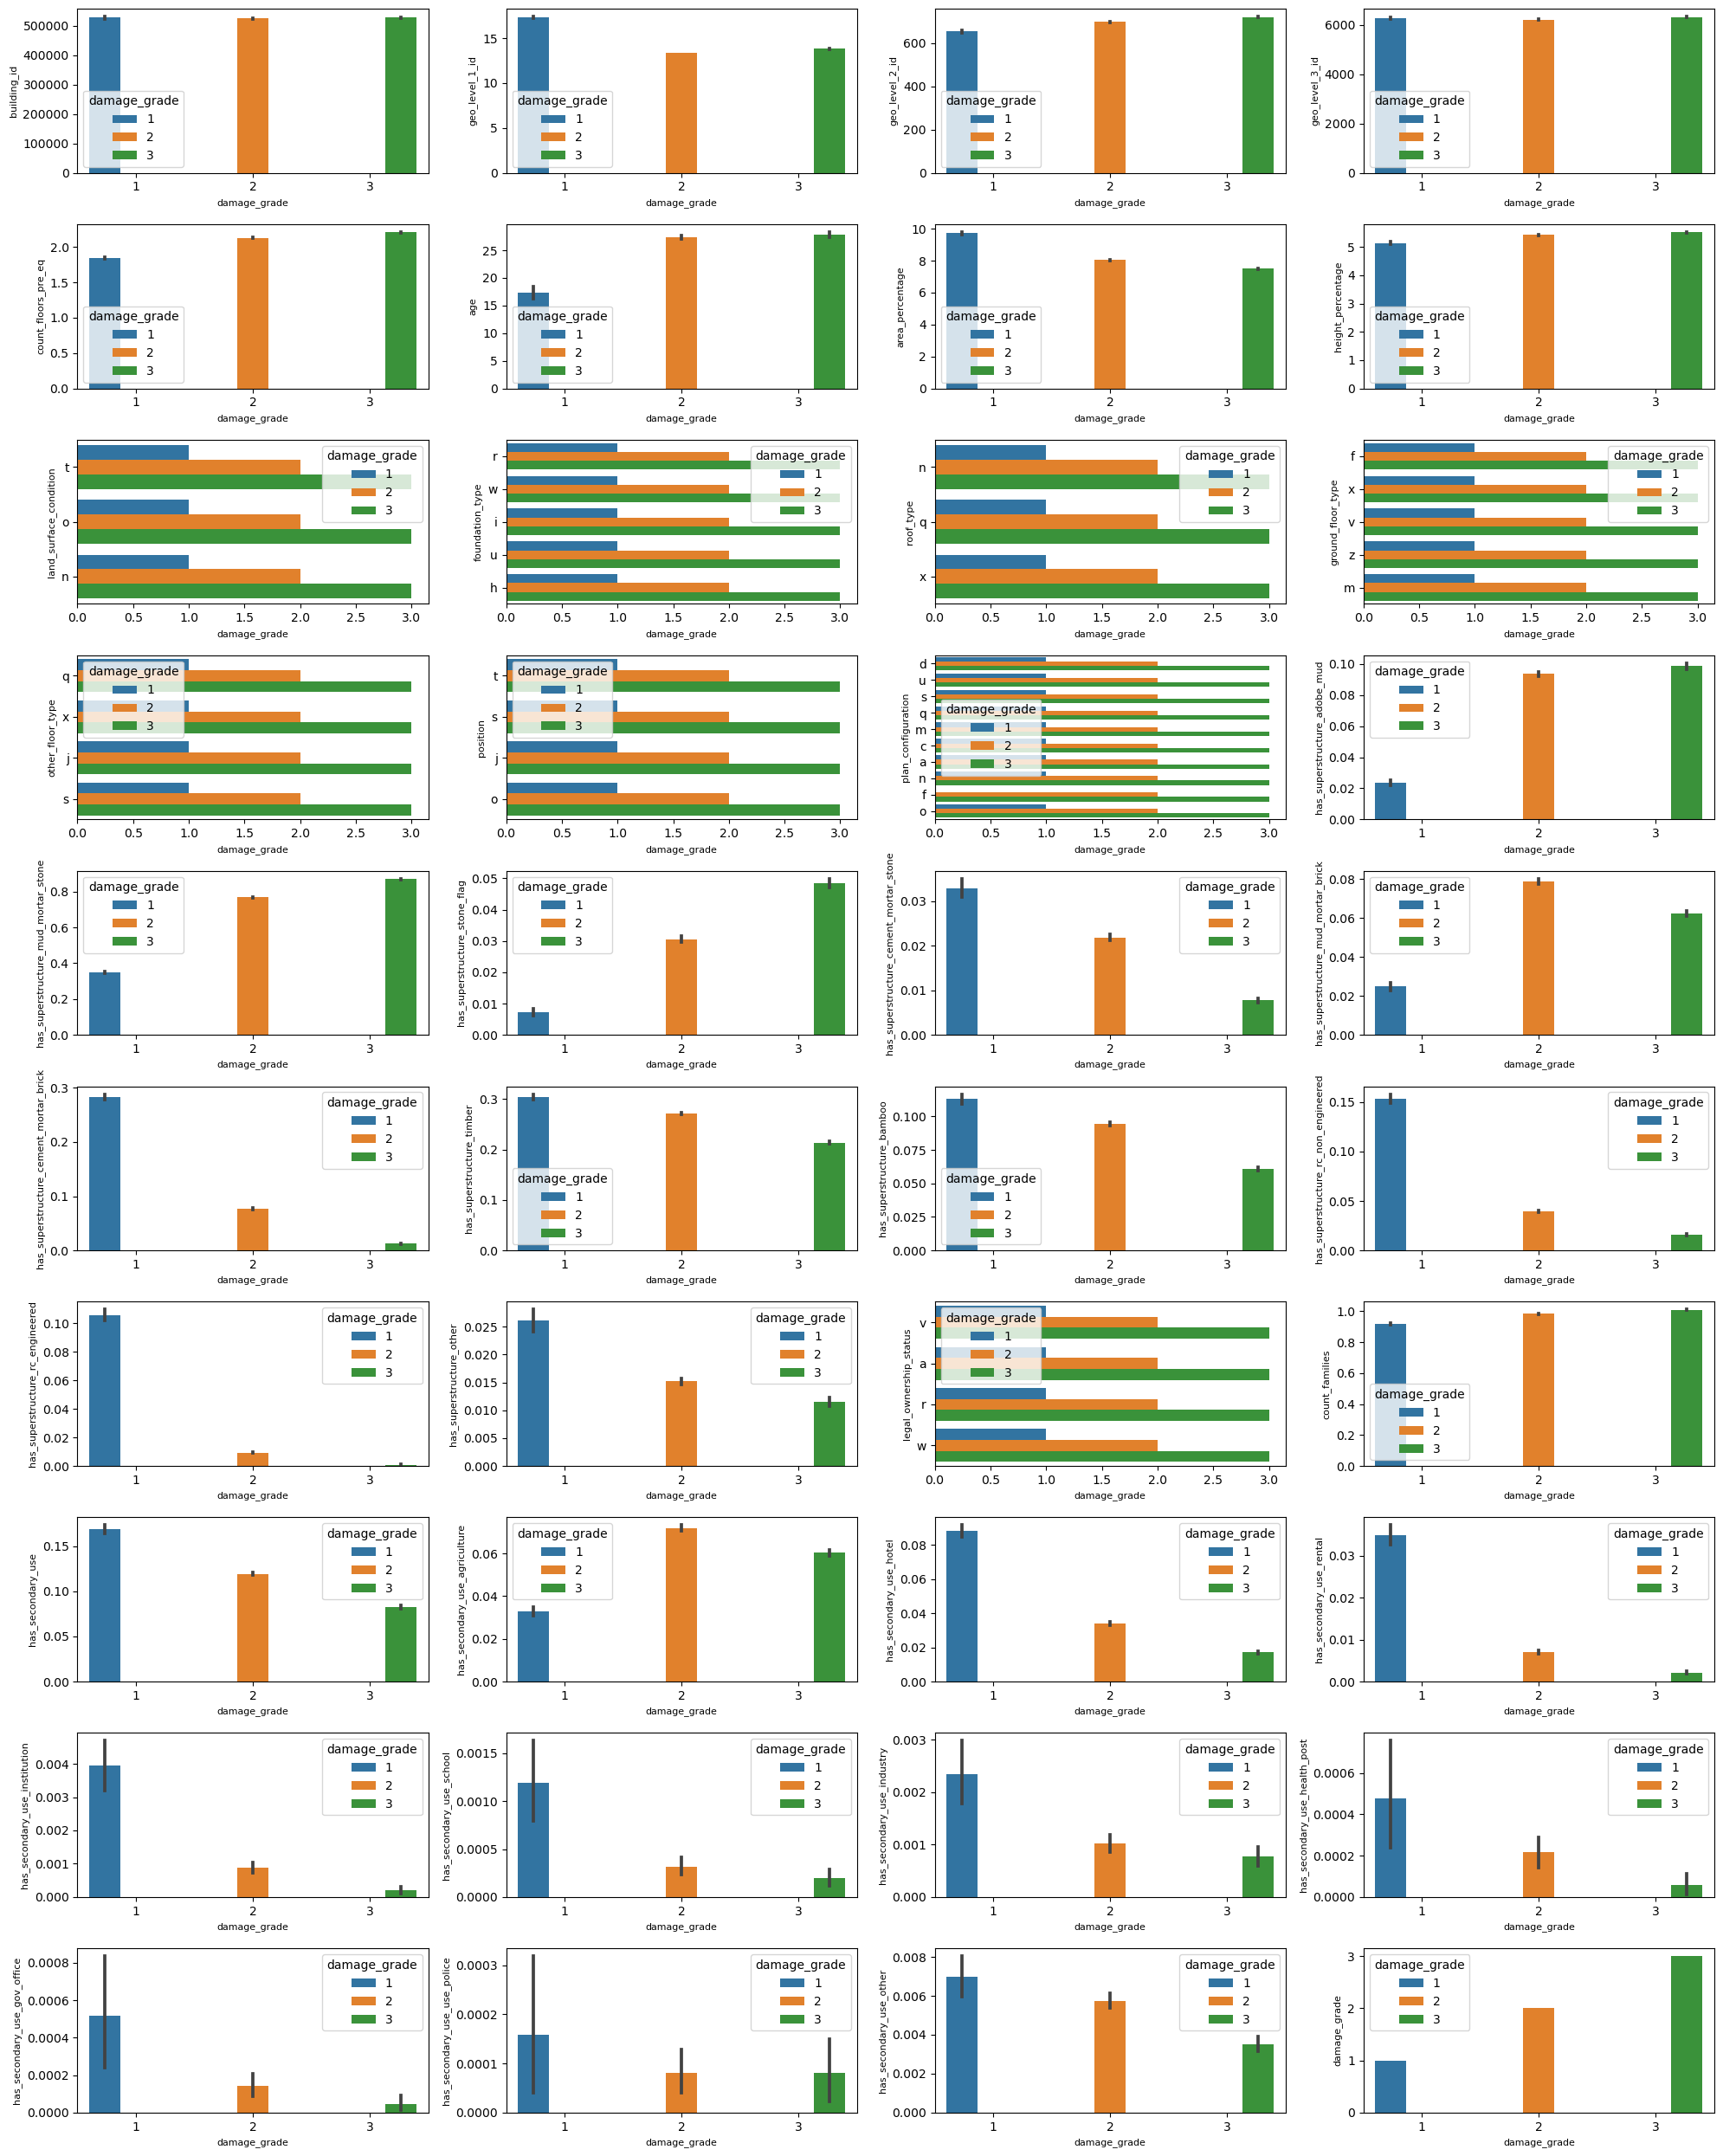

In [26]:
plt.figure(figsize=(20,25))
plotnumber =1

for column in data:
    plt.subplot(10,4,plotnumber)
    sns.barplot(x = data['damage_grade'],y= data[column], data=data, hue=data['damage_grade'])
    plt.xlabel('damage_grade',fontsize=8)
    plt.ylabel(column,fontsize=8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plotnumber+=1
    
plt.tight_layout()
plt.show()

# Data Pre-processing

In [27]:
data.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [28]:
# Checking for duplicate records.
data.duplicated().sum()

0

**There are No duplicate records found in this dataset**

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

## Converting Categorical data

### 1. land_surface_condition

In [30]:
data['land_surface_condition'].value_counts()

land_surface_condition
t    216757
n     35528
o      8316
Name: count, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['land_surface_condition']=label_encoder.fit_transform(data['land_surface_condition'])

### 2. foundation_type

In [32]:
data['foundation_type'].value_counts()

foundation_type
r    219196
w     15118
u     14260
i     10579
h      1448
Name: count, dtype: int64

In [33]:
data['foundation_type']=label_encoder.fit_transform(data['foundation_type'])

### 3. roof_type

In [34]:
data['roof_type'].value_counts()

roof_type
n    182842
q     61576
x     16183
Name: count, dtype: int64

In [35]:
data['roof_type']=label_encoder.fit_transform(data['roof_type'])

### 4. ground_floor_type

In [36]:
data['ground_floor_type'].value_counts()

ground_floor_type
f    209619
x     24877
v     24593
z      1004
m       508
Name: count, dtype: int64

In [37]:
data['ground_floor_type']=label_encoder.fit_transform(data['ground_floor_type'])

### 5. other_floor_type

In [38]:
data['other_floor_type'].value_counts()

other_floor_type
q    165282
x     43448
j     39843
s     12028
Name: count, dtype: int64

In [39]:
data['other_floor_type']=label_encoder.fit_transform(data['other_floor_type'])

### 6. position

In [40]:
data['position'].value_counts()

position
s    202090
t     42896
j     13282
o      2333
Name: count, dtype: int64

In [41]:
data['position']=label_encoder.fit_transform(data['position'])

### 7. plan_configuration

In [42]:
data['plan_configuration'].value_counts()

plan_configuration
d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: count, dtype: int64

In [43]:
data['plan_configuration']=label_encoder.fit_transform(data['plan_configuration'])

### 8. legal_ownership_status

In [44]:
data['legal_ownership_status'].value_counts()

legal_ownership_status
v    250939
a      5512
w      2677
r      1473
Name: count, dtype: int64

In [45]:
data['legal_ownership_status']=label_encoder.fit_transform(data['legal_ownership_status'])

### 9. Damage_grade

In [46]:
data['damage_grade'].value_counts()

damage_grade
2    148259
3     87218
1     25124
Name: count, dtype: int64

In [47]:
data['damage_grade'] = data['damage_grade'].map({1:0,2:1,3:2})

**Bivariate Analysis After converting categorical Variables**

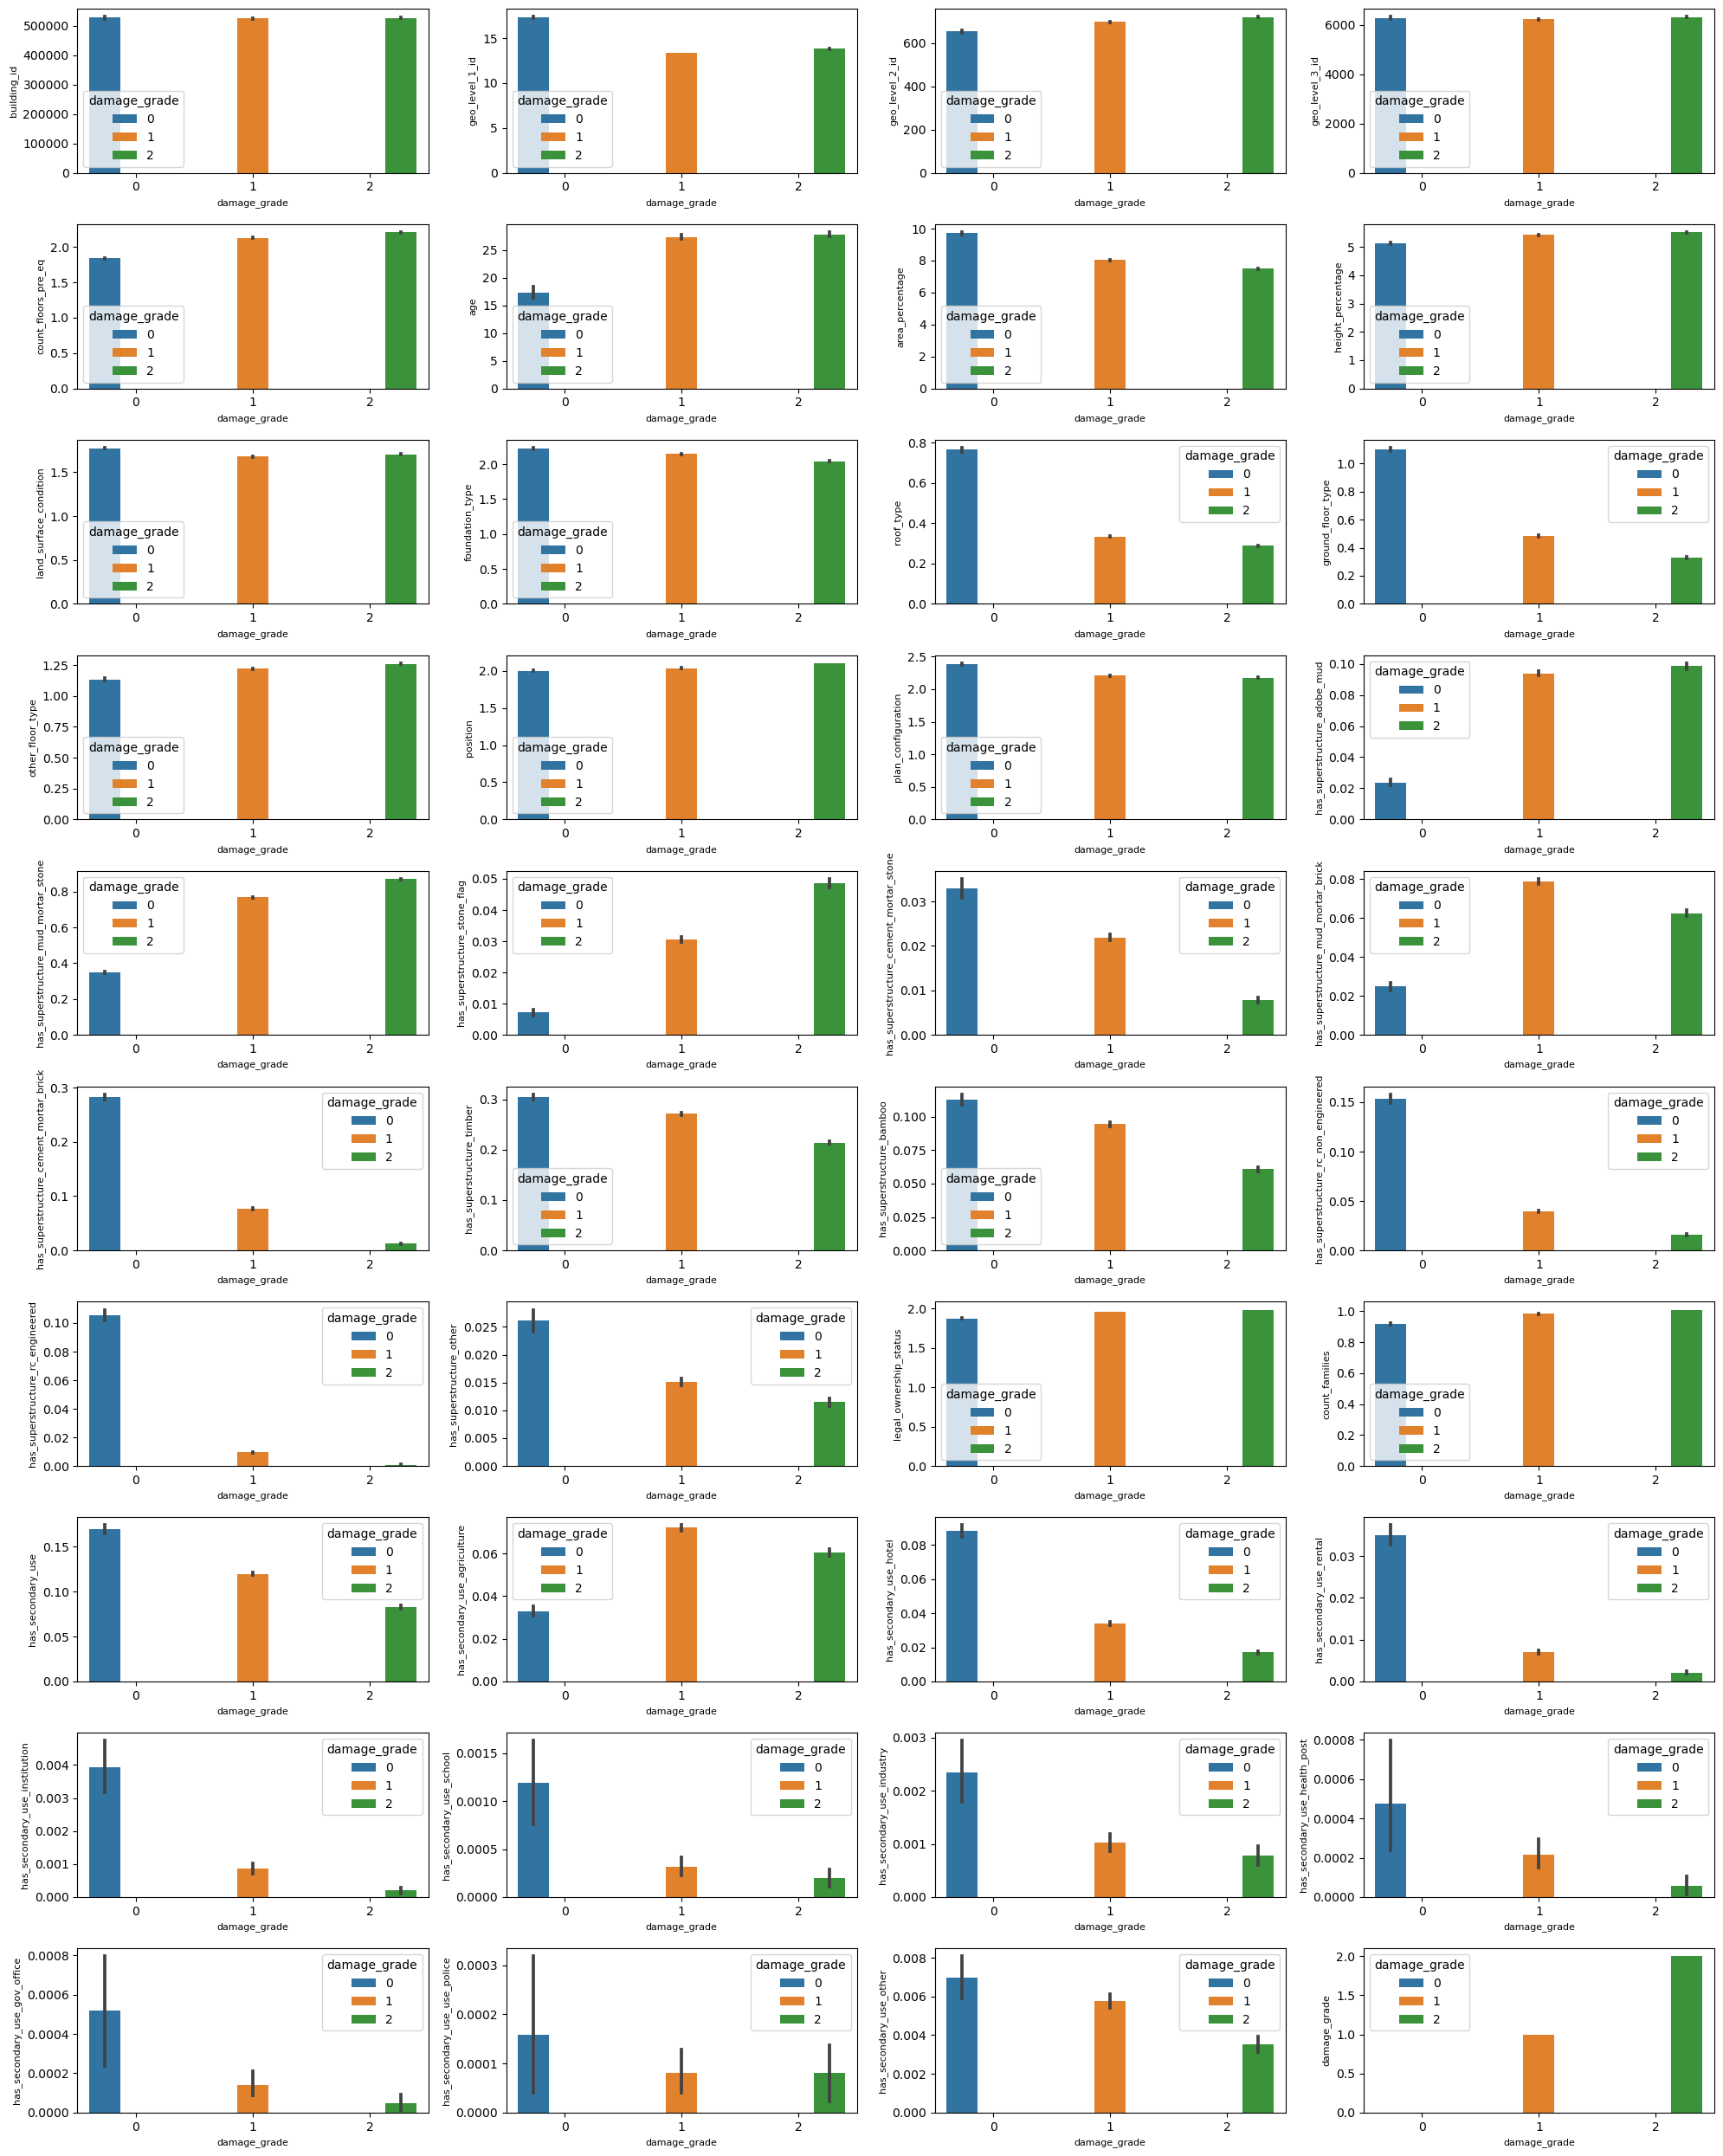

In [48]:
plt.figure(figsize=(20,25))
plotnumber =1

for column in data:
    plt.subplot(10,4,plotnumber)
    sns.barplot(x = data['damage_grade'],y= data[column], data=data, hue=data['damage_grade'])
    plt.xlabel('damage_grade',fontsize=8)
    plt.ylabel(column,fontsize=8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plotnumber+=1
    
plt.tight_layout()
plt.show()

### Insights From Bivariate Analysis

1. Geographic Region Analysis: Geo level 1 has the highest number of records with damage grade 1, indicating low damage levels compared to more specific sub-regions (level 2 and 3). This suggests that the severity of damage decreases as we move from more specific sub-regions to larger geographic regions.
<br>

2. Building Characteristics: Higher counts of floors before the earthquake (count_floors_pre_eq) and older building ages correlate with higher damage grades. This implies that older buildings with more floors are more susceptible to severe damage during earthquakes.
<br>

3. Area Percentage Impact: Buildings with larger area percentages tend to have lower damage rates, particularly with damage grade 1, indicating minimal damage. This suggests that buildings with larger footprints are more resilient during earthquakes.
<br>

4. Adobe and Mud Structures: Buildings constructed with adobe or mud materials (has_superstructure_adobe_mud) exhibit higher damage grades, indicating moderate to severe damage levels during earthquakes.

<br>

 5. Stone Structures: Structures made of mud mortar stone and stone (has_superstructure_mud_mortar_stone, has_superstructure_stone_flag) also show patterns of higher damage grades, suggesting susceptibility to seismic activity.
<br>

6. Cement Mortar Strength: Buildings with superstructures made of cement mortar (has_superstructure_cement_mortar_stone, has_superstructure_cement_mortar_brick) demonstrate lower damage rates, indicating higher resistance to earthquake forces.

<br>

7. Mud Mortar Brick Structures: Buildings constructed with mud mortar brick show moderate to severe damage levels (damage grades 2 and 3), reflecting vulnerabilities in such construction materials during seismic events.
<br>

8. Reinforced Concrete Effectiveness: The presence of engineered reinforced concrete (has_superstructure_rc_engineered) results in fewer records with mass destruction (damage grade 3) compared to non-engineered reinforced concrete (has_superstructure_rc_non_engineered).
<br>
9. Secondary Use Impact: Buildings with secondary use exhibit a trend of lower damage, suggesting that repurposed buildings are less prone to severe damage during earthquakes, possibly due to structural alterations or reinforcements.

<br>

10. Legal Ownership and Damage: Legal ownership status (legal_ownership_status) does not show a significant correlation with damage grade, indicating that ownership status may not be a determining factor in building resilience during earthquakes.

# Feature Engineering

<Axes: >

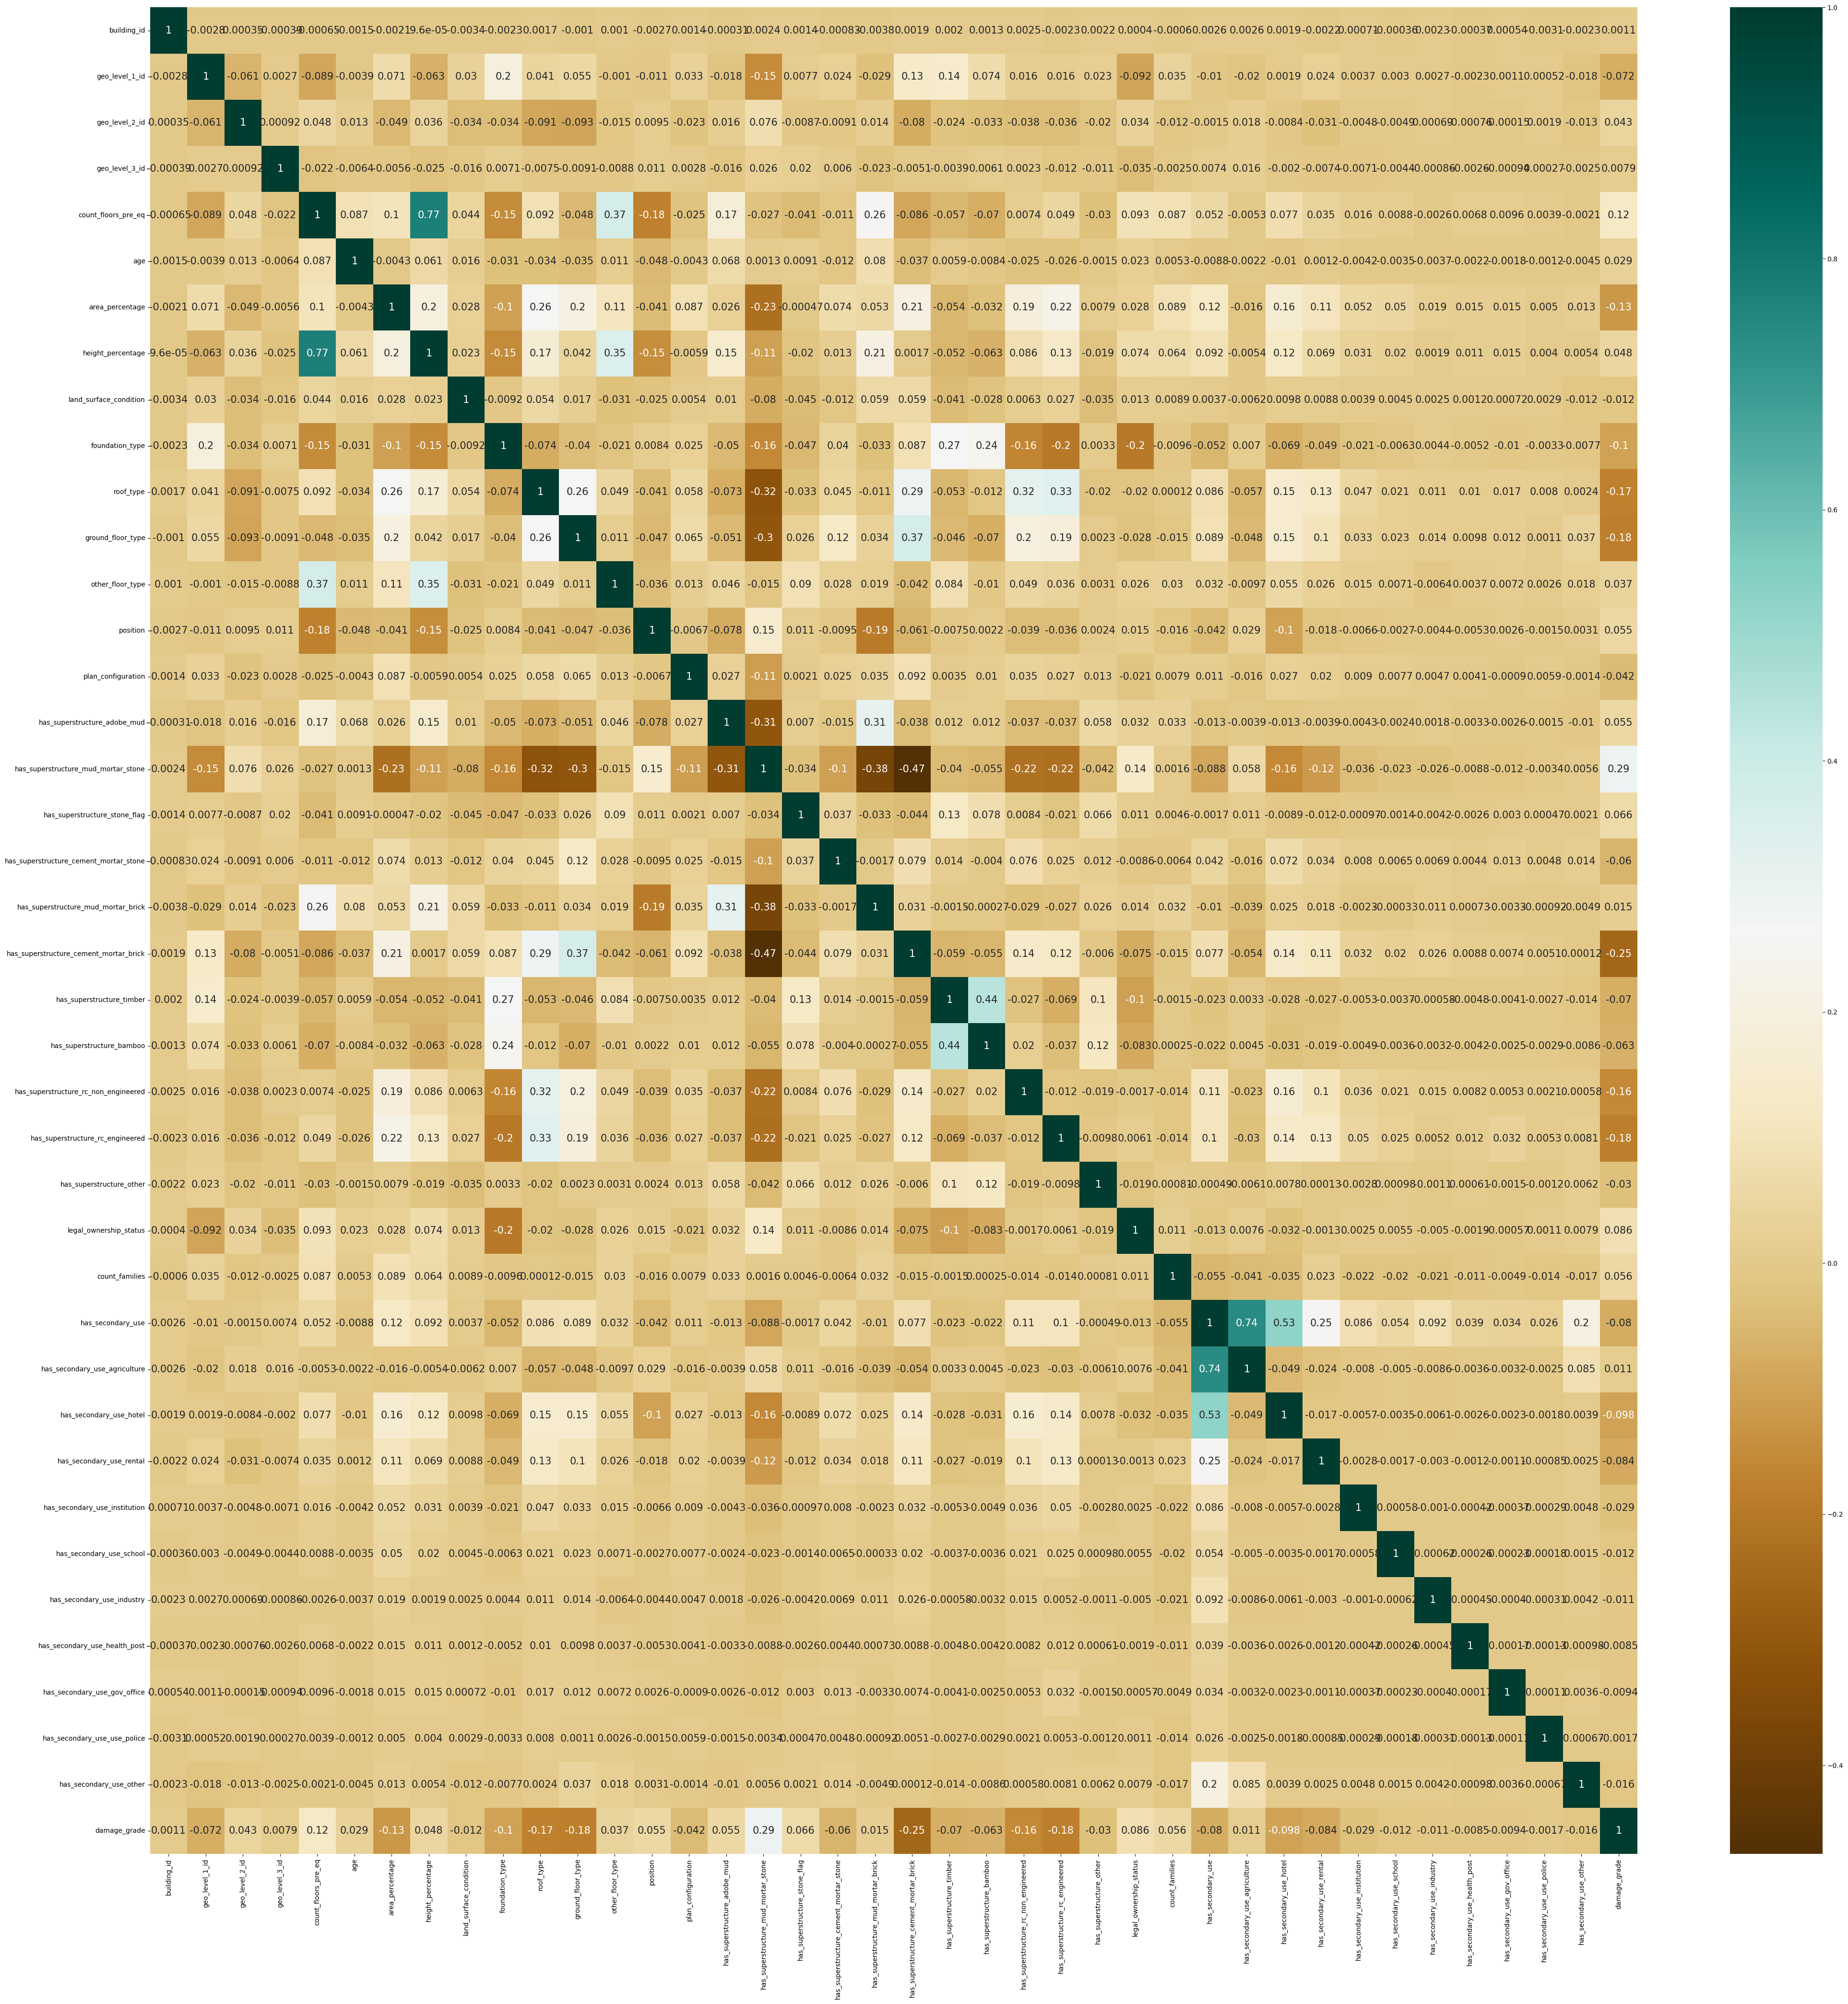

In [49]:
# HEATMAP: to find Correlation between Variables.
plt.figure(figsize=(50,50),facecolor='white')
sns.heatmap(data.corr(),annot=True,cmap = 'BrBG',annot_kws = {'size':15})

**Insights From Heatmap**

1. Count floors pre_eq and height percentage exhibit a high correlation, suggesting that they convey similar information. Consequently, we can consider eliminating one of these features from our dataset to avoid redundancy and multicollinearity.

2. Building ID demonstrates low correlation with the target variables, indicating that it does not significantly impact the damage grade. Therefore, we can safely drop the building ID feature from our analysis without affecting the predictive performance of our model.

3. There is a strong correlation between has_secondary_use and has_secondary_use_agriculture features. Given their redundancy in conveying similar information, we can opt to remove the has_secondary_use_agriculture feature from our dataset without compromising the predictive power of our model.

In [50]:
data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [51]:
# Dropping Highly correlated Features.
data.drop('has_secondary_use_agriculture',axis=1,inplace=True)

In [52]:
# This features represents only unique identity of each row, it does't have any relationship on target feature
data.drop('building_id',axis=1,inplace=True)

In [53]:
# These Features also week relationship on target feature
data.drop('count_families',axis=1,inplace=True)
data.drop('position',axis=1,inplace=True)

**Based on domain knowledge and weak correlation with the target variable, it appears that the presence of secondary uses for each building does not significantly influence the target variable. Therefore, we can safely drop these features from our analysis to simplify the model without sacrificing predictive accuracy.**

In [54]:
data.drop('has_secondary_use_hotel',axis=1,inplace=True)
data.drop('has_secondary_use_rental',axis=1,inplace=True)
data.drop('has_secondary_use_institution',axis=1,inplace=True)
data.drop('has_secondary_use_school',axis=1,inplace=True)
data.drop('has_secondary_use_industry',axis=1,inplace=True)
data.drop('has_secondary_use_health_post',axis=1,inplace=True)
data.drop('has_secondary_use_gov_office',axis=1,inplace=True)
data.drop('has_secondary_use_use_police',axis=1,inplace=True)
data.drop('has_secondary_use_other',axis=1,inplace=True)

In [55]:
data.shape

(260601, 27)

In [56]:
data.duplicated().sum()

18228

**After removing features with weak relationships, the dataset contains 18,228 duplicated values.**

In [59]:
# Dropping the duplicate values.
data.drop_duplicates(inplace=True)

In [60]:
data.shape

(242373, 27)

## Splitting the data into training and testing set

In [61]:
# Creating independent and dependent features
x = data.iloc[:,:26]
y = data.iloc[:,-1]

In [62]:
x

geo_level_1_id  geo_level_2_id  geo_level_3_id  count_floors_pre_eq  \
0                    6             487           12198                    2   
1                    8             900            2812                    2   
2                   21             363            8973                    2   
3                   22             418           10694                    2   
4                   11             131            1488                    3   
...                ...             ...             ...                  ...   
260594              27             181            1537                    6   
260596              25            1335            1621                    1   
260597              17             715            2060                    2   
260598              17              51            8163                    3   
260600              21               9            9101                    3   

        age  area_percentage  height_percentage  land_surface_condition  \
0        30                6                  5                       2   
1        10                8                  7                       1   
2        10                5                  5                       2   
3        10                6                  5                       2   
4        30                8                  9                       2   
...     ...              ...                ...                     ...   
260594    0               13                 12                       2   
260596   55                6                  3                       0   
260597    0                6                  5                       2   
260598   55                6                  7                       2   
260600   10                7                  6                       0   

        foundation_type  roof_type  ground_floor_type  other_floor_type  \
0                     2          0                  0                 1   
1                     2          0                  3                 1   
2                     2          0                  0                 3   
3                     2          0                  0                 3   
4                     2          0                  0                 3   
...                 ...        ...                ...               ...   
260594                2          0                  0                 3   
260596                2          0                  0                 0   
260597                2          0                  0                 1   
260598                2          1                  0                 1   
260600                2          0                  0                 1   

        plan_configuration  has_superstructure_adobe_mud  \
0                        2                             1   
1                        2                             0   
2                        2                             0   
3                        2                             0   
4                        2                             1   
...                    ...                           ...   
260594                   2                             0   
260596                   7                             0   
260597                   2                             0   
260598                   2                             0   
260600                   2                             0   

        has_superstructure_mud_mortar_stone  has_superstructure_stone_flag  \
0                                         1                              0   
1                                         1                              0   
2                                         1                              0   
3                                         1                              0   
4                                         0                              0   
...                                     ...                         

In [63]:
y

0         2
1         1
2         2
3         1
4         2
         ..
260594    1
260596    1
260597    2
260598    2
260600    2
Name: damage_grade, Length: 242373, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,stratify=y,random_state=42)

## Applying SMOTE to the data to address class imbalance.

**When applying SMOTE to balance the data, the increased computational load resulted in longer model training times and suboptimal performance, failing to yield satisfactory results.**

In [66]:
x_train.shape

(193898, 26)

## Applying undersampling to balance the classes in the dataset.

**Undersampling was implemented, but it unexpectedly lowered the model accuracy. In this dataset, neither undersampling nor oversampling techniques seem to be effective for improving model performance.**

# Model Creation

# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr')

In [68]:
model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [69]:
y_pred = model.predict(x_test)

In [70]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
# Testing Score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.04      0.07      4826
           1       0.57      0.99      0.73     27707
           2       0.36      0.00      0.01     15942

    accuracy                           0.57     48475
   macro avg       0.47      0.34      0.27     48475
weighted avg       0.49      0.57      0.42     48475



In [71]:
# predicting for training data 
y_pred_train = model.predict(x_train)
# training score
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.49      0.04      0.07     19304
           1       0.57      0.99      0.73    110827
           2       0.36      0.00      0.01     63767

    accuracy                           0.57    193898
   macro avg       0.47      0.34      0.27    193898
weighted avg       0.49      0.57      0.42    193898



In [72]:
# f1_score
f1_logistic = f1_score(y_test,y_pred,average='weighted')
f1_logistic

0.42323564112828177

# Decision Tree Classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_dtc = dtc.predict(x_test)
y_pred_dtctrain = dtc.predict(x_train)

In [74]:
# Testing score.66
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.47      0.49      0.48      4826
           1       0.69      0.68      0.68     27707
           2       0.57      0.58      0.57     15942

    accuracy                           0.63     48475
   macro avg       0.57      0.58      0.58     48475
weighted avg       0.63      0.63      0.63     48475



In [75]:
# training score .98
print(classification_report(y_train,y_pred_dtctrain))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     19304
           1       0.97      0.99      0.98    110827
           2       1.00      0.95      0.98     63767

    accuracy                           0.98    193898
   macro avg       0.98      0.98      0.98    193898
weighted avg       0.98      0.98      0.98    193898



In [76]:
# f1_score
f1_dt = f1_score(y_test,y_pred_dtc,average='weighted')
f1_dt

0.6259814364861684

# Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)
y_pred_rfctrain = rfc.predict(x_train)

In [78]:
# Testing score.72
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.62      0.47      0.54      4826
           1       0.71      0.80      0.75     27707
           2       0.68      0.57      0.62     15942

    accuracy                           0.69     48475
   macro avg       0.67      0.62      0.64     48475
weighted avg       0.69      0.69      0.69     48475



In [79]:
# training score.98
print(classification_report(y_train,y_pred_rfctrain))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     19304
           1       0.98      0.99      0.98    110827
           2       0.98      0.97      0.98     63767

    accuracy                           0.98    193898
   macro avg       0.98      0.98      0.98    193898
weighted avg       0.98      0.98      0.98    193898



In [80]:
# f1_score
f1_rf = f1_score(y_test,y_pred_rfc,average='weighted')
f1_rf

0.688775085252795

# Naive Bayes

In [81]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(x_train,y_train)
y_pred_NB = NB.predict(x_test)
y_pred_NBtrain = NB.predict(x_train)

In [82]:
# Testing score
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.13      0.58      0.21      4826
           1       0.61      0.10      0.17     27707
           2       0.34      0.48      0.40     15942

    accuracy                           0.27     48475
   macro avg       0.36      0.39      0.26     48475
weighted avg       0.48      0.27      0.25     48475



In [83]:
# training score
print(classification_report(y_train,y_pred_NBtrain))

              precision    recall  f1-score   support

           0       0.13      0.57      0.21     19304
           1       0.61      0.10      0.17    110827
           2       0.35      0.48      0.40     63767

    accuracy                           0.27    193898
   macro avg       0.36      0.38      0.26    193898
weighted avg       0.48      0.27      0.25    193898



In [84]:
# f1_score
f1_naive = f1_score(y_test,y_pred_NB,average='weighted')
f1_naive

0.24798701597405234

# Hyperparameter tuning for Decision Tree

In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
# Hyper parameters for decision tree
params = {
    'criterion':('ginni','entropy'),
    'splitter':('best','random'),
    'max_depth':(list(range(1,20))),
    'min_samples_split':(list(range(1,20))),
    'min_samples_leaf':(list(range(1,20)))
}

dtc_tree = DecisionTreeClassifier(random_state=23)
dtc_tree_cv = RandomizedSearchCV(dtc_tree,params,verbose=2,n_jobs=-1,cv=3,n_iter = 500,scoring='accuracy')

dtc_tree_cv.fit(x_train,y_train) # Training the data on RandomizedSearchCV
best_parameters = dtc_tree_cv.best_params_ # it will give us best parameters
# Printing the best parameters for further predictions
print('best_parameters:',best_parameters)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
best_parameters: {'splitter': 'best', 'min_samples_split': 16, 'min_samples_leaf': 17, 'max_depth': 18, 'criterion': 'entropy'}


In [87]:
dtclassifier = DecisionTreeClassifier(splitter='best',min_samples_split=16, min_samples_leaf=17, max_depth=18, criterion='entropy',random_state=23)

In [88]:
dtclassifier.fit(x_train,y_train)
y_pred_dt = dtclassifier.predict(x_test)
y_pred_dttrain = dtclassifier.predict(x_train)

In [89]:
# Testing score
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.58      0.44      0.50      4826
           1       0.71      0.82      0.76     27707
           2       0.70      0.57      0.63     15942

    accuracy                           0.70     48475
   macro avg       0.66      0.61      0.63     48475
weighted avg       0.69      0.70      0.69     48475



In [90]:
# training score
print(classification_report(y_train,y_pred_dttrain))

              precision    recall  f1-score   support

           0       0.68      0.52      0.59     19304
           1       0.74      0.85      0.79    110827
           2       0.75      0.61      0.67     63767

    accuracy                           0.74    193898
   macro avg       0.72      0.66      0.68    193898
weighted avg       0.74      0.74      0.73    193898



In [91]:
# f1_score
f1_tuning_dt = f1_score(y_test,y_pred_dt,average='weighted')
f1_tuning_dt

0.6899194466225557

# Hyperparameter tuning for Random Forest

In [92]:
# Hyper parameters for Random Forest
param_grid = {
    'n_estimators':[1000,1200],
    'max_depth':(list(range(5,25))),
    'min_samples_split':(list(range(5,25))),
    'min_samples_leaf':(list(range(5,25))),
    'max_features':['auto','sqrt'],
    'bootstrap':[True,False]}

rfclassifier = RandomForestClassifier(random_state=43)
rf_tree_rcv = RandomizedSearchCV(rfclassifier,param_grid,verbose=2,n_jobs=-1,cv=3,n_iter=10,scoring='accuracy')

rf_tree_rcv.fit(x_train,y_train) # Training the data on GridSearchCV

best_parameters1 = rf_tree_rcv.best_params_
# printing best parameters for further prediction
print('best parameters:',best_parameters1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
best parameters: {'n_estimators': 1200, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 21, 'bootstrap': False}


In [93]:
rfclassifier = RandomForestClassifier(n_estimators= 1200, min_samples_split= 19, min_samples_leaf= 6, max_features= 'auto', max_depth= 21, bootstrap= False,random_state=32)
rfclassifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=21, max_features='auto',
                       min_samples_leaf=6, min_samples_split=19,
                       n_estimators=1200, random_state=32)

In [94]:
y_pred_rf = rfclassifier.predict(x_test)
y_pred_rftrain = rfclassifier.predict(x_train)

In [95]:
# Testing score
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.69      0.41      0.51      4826
           1       0.69      0.88      0.77     27707
           2       0.75      0.49      0.59     15942

    accuracy                           0.70     48475
   macro avg       0.71      0.59      0.63     48475
weighted avg       0.71      0.70      0.69     48475



In [96]:
# training score
print(classification_report(y_train,y_pred_rftrain))

              precision    recall  f1-score   support

           0       0.83      0.50      0.62     19304
           1       0.73      0.92      0.81    110827
           2       0.82      0.56      0.66     63767

    accuracy                           0.76    193898
   macro avg       0.79      0.66      0.70    193898
weighted avg       0.77      0.76      0.74    193898



In [97]:
# f1_score 
f1_tuning_rf = f1_score(y_test,y_pred_rf,average='weighted')
f1_tuning_rf

0.687456518090773

# Using Bagging for Decision Tree

In [98]:
from sklearn.ensemble import BaggingClassifier
model_bag_dt = BaggingClassifier(base_estimator = dtc, n_estimators = 10,random_state = 87)
model_bag_dt.fit(x_train,y_train)
y_pred_bag_dt = model_bag_dt.predict(x_test)
y_pred_bagtrain_dt = model_bag_dt.predict(x_train)

In [99]:
print(classification_report(y_test,y_pred_bag_dt))

              precision    recall  f1-score   support

           0       0.57      0.53      0.55      4826
           1       0.71      0.78      0.74     27707
           2       0.66      0.57      0.61     15942

    accuracy                           0.68     48475
   macro avg       0.65      0.62      0.63     48475
weighted avg       0.68      0.68      0.68     48475



In [100]:
# Training Accuracy
print(classification_report(y_train,y_pred_bagtrain_dt))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     19304
           1       0.96      0.98      0.97    110827
           2       0.97      0.94      0.95     63767

    accuracy                           0.96    193898
   macro avg       0.96      0.96      0.96    193898
weighted avg       0.96      0.96      0.96    193898



In [104]:
# f1_score 
f1_tuning_rf = f1_score(y_test,y_pred_bag_dt,average='weighted')
f1_tuning_rf

0.6802719919031351

# Using Bagging for Random Forest

In [101]:
from sklearn.ensemble import BaggingClassifier
model_bag = BaggingClassifier(base_estimator = rfc, n_estimators = 10,random_state = 87)
model_bag.fit(x_train,y_train)
y_pred_bag = model_bag.predict(x_test)
y_pred_bagtrain = model_bag.predict(x_train)

In [102]:
# Testing Accuracy
print(classification_report(y_test,y_pred_bag))

              precision    recall  f1-score   support

           0       0.65      0.45      0.53      4826
           1       0.71      0.83      0.76     27707
           2       0.71      0.57      0.63     15942

    accuracy                           0.70     48475
   macro avg       0.69      0.62      0.64     48475
weighted avg       0.70      0.70      0.70     48475



In [103]:
# Training Accuracy
print(classification_report(y_train,y_pred_bagtrain))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91     19304
           1       0.93      0.97      0.95    110827
           2       0.96      0.91      0.93     63767

    accuracy                           0.94    193898
   macro avg       0.95      0.92      0.93    193898
weighted avg       0.94      0.94      0.94    193898



In [112]:
# f1_score 
f1_tuning_rf = f1_score(y_test,y_pred_bag,average='weighted')
f1_tuning_rf

0.6970522207897122

# Gradient Boosting :GB

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier() 
gbr.fit(x_train,y_train)
y_pred_gb = gbr.predict(x_test)
y_pred_gbtrain = gbr.predict(x_train)

In [109]:
# Testing Accuracy
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.64      0.37      0.47      4826
           1       0.67      0.87      0.75     27707
           2       0.71      0.44      0.54     15942

    accuracy                           0.68     48475
   macro avg       0.67      0.56      0.59     48475
weighted avg       0.68      0.68      0.66     48475



In [110]:
# Training Accuracy
print(classification_report(y_train,y_pred_gbtrain))

              precision    recall  f1-score   support

           0       0.63      0.36      0.46     19304
           1       0.67      0.87      0.76    110827
           2       0.72      0.44      0.55     63767

    accuracy                           0.68    193898
   macro avg       0.67      0.56      0.59    193898
weighted avg       0.68      0.68      0.66    193898



In [111]:
# f1_score 
f1_tuning_rf = f1_score(y_test,y_pred_gb,average='weighted')
f1_tuning_rf

0.6560678185926135

# XGB

In [ ]:
!pip install xgboost

In [153]:
import xgboost

In [114]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 34)
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)

In [115]:
# Testing Accuracy
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.68      0.45      0.54      4826
           1       0.71      0.85      0.78     27707
           2       0.73      0.57      0.64     15942

    accuracy                           0.72     48475
   macro avg       0.71      0.62      0.65     48475
weighted avg       0.72      0.72      0.71     48475



In [116]:
y_pred_train = xgb.predict(x_train)
# Training Accuracy
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.74      0.48      0.58     19304
           1       0.73      0.87      0.79    110827
           2       0.76      0.59      0.66     63767

    accuracy                           0.74    193898
   macro avg       0.74      0.65      0.68    193898
weighted avg       0.74      0.74      0.73    193898



In [118]:
# f1_score 
f1_tuning_rf = f1_score(y_test,y_pred_xgb,average='weighted')
f1_tuning_rf

0.7071669419048923

In [120]:
# creating a dictionary.
my_dict = {'Model':['Logistic Regression','DecisionTree','RandomForest','Naive Bayes','HPT decision tree','HPT random forest','Bagging for DT','Bagging for RF','Gradient Boosting:GB','XGB'],
           'Acc_score for Test':[0.57,0.63,0.69,0.27,0.70,0.70,0.68,0.70,0.68,0.72],
           'Acc_score for Train':[0.57,0.98,0.98,0.27,0.74,0.76,0.96,0.94,0.86,0.74],
           'F1_score':[0.42,0.62,0.68,0.24,0.68,0.68,0.65,0.69,0.65,0.70]}

In [121]:
Model_Scores = pd.DataFrame(my_dict)
Model_Scores 

Model  Acc_score for Test  Acc_score for Train  F1_score
0   Logistic Regression                0.57                 0.57      0.42
1          DecisionTree                0.63                 0.98      0.62
2          RandomForest                0.69                 0.98      0.68
3           Naive Bayes                0.27                 0.27      0.24
4     HPT decision tree                0.70                 0.74      0.68
5     HPT random forest                0.70                 0.76      0.68
6        Bagging for DT                0.68                 0.96      0.65
7        Bagging for RF                0.70                 0.94      0.69
8  Gradient Boosting:GB                0.68                 0.86      0.65
9                   XGB                0.72                 0.74      0.70

# Challenges faced:

1. **Large Dataset**: Understanding a dataset with 260,000 records and 40 columns posed a significant challenge due to its size and complexity.
   - **Solution**: Took time to break down the dataset into smaller chunks, focusing on one aspect at a time. Utilized summary statistics and data profiling techniques to gain initial insights.

2. **Categorical Variables**: Converting categorical variables into numerical ones manually was challenging, especially ensuring meaningful encoding.
   - **Solution**: Opted for manual encoding to prioritize commonly occurring categories, aiming for better representation of the data. Tested various encoding techniques to find the most suitable one.

3. **Exploratory Data Analysis (EDA)**: Conducting EDA on a large dataset was time-consuming, and visualizations were challenging to interpret.
   - **Solution**: Experimented with different visualization techniques, emphasizing plots suitable for large datasets. Focused on essential plots that provided clear insights, avoiding overly complex visualizations.

4. **Feature Correlation**: Identifying highly correlated features was challenging, especially deciding which features to eliminate.
   - **Solution**: Used domain knowledge to determine the significance of correlated features. Considered correlation thresholds and consulted with domain experts to make informed decisions on feature elimination.

5. **Imbalanced Dataset**: Dealing with class imbalance required balancing techniques like SMOTE.
   - **Solution**: Applied SMOTE to address class imbalance, ensuring better representation of minority classes in the training data.

6. **Model Training**: Training a large dataset on different algorithms posed a computational challenge.
   - **Solution**: Leveraged parallel computing frameworks and optimized algorithms for efficiency. Employed sampling techniques or feature selection to reduce computational burden.

7. **Understanding Features**: Understanding the significance of each feature and its relevance to the project was difficult, particularly with categorical features.
   - **Solution**: Conducted thorough feature analysis and consulted project documentation to understand the importance of each feature. Utilized feature importance techniques to prioritize features for model training.

8. **Training Time**: Training time was prolonged due to the large size of the dataset, especially during hyperparameter tuning.
   - **Solution**: Employed distributed computing frameworks or cloud-based solutions to accelerate training. Utilized feature importance or dimensionality reduction techniques to reduce the number of features, thereby speeding up training.

9. **Model Evaluation**: Evaluating model performance and selecting the best-performing algorithms was challenging amidst the complexity of the dataset.
   - **Solution**: Conducted extensive model evaluation using appropriate metrics and cross-validation techniques. Selected models based on comprehensive evaluation results and compared against baseline performance.
10. **GridSearchCV Performance**: GridSearchCV was inefficient and time-consuming, taking hours to find the best parameters for models like Random Forest and Decision Tree.
   - **Solution**: Switched to RandomizedSearchCV, which offers similar parameter optimization capabilities but with faster performance. Utilized RandomizedSearchCV to efficiently explore a wide range of hyperparameters and find optimal configurations within a reasonable timeframe.
11. **Challenges with SMOTE Implementation**: Despite attempting to balance the data using SMOTE, the process resulted in prolonged model training durations and yielded unsatisfactory performance, posing challenges in achieving desired outcomes.

# Conclusion

1. **Top Performer:** XGBoost (XGB) stands out with the highest accuracy (0.72) and F1 score (0.70), making it the best choice for production.
2. **Underperformer:** Naive Bayes lags behind with the lowest accuracy (0.27) and F1 score (0.24), indicating limited suitability for this task.
3. **Comparable Models:** Decision Tree, Random Forest, and Bagging for Random Forest show similar performance, with accuracy scores ranging from 0.63 to 0.70 and F1 scores from 0.62 to 0.69.
4. **Overfitting Risk:** Some models, like Decision Tree and Random Forest, exhibit slightly higher accuracy on training data than testing data, suggesting potential overfitting.
5. **Consistent Performance:** XGBoost and Gradient Boosting maintain consistent accuracy and F1 scores across both training and testing datasets, indicating better generalization.
6. **Production Recommendation:** XGBoost's balanced performance and robustness make it the ideal choice for deployment in production environments.
7. **Model Selection:** Consider the trade-offs between performance and complexity when choosing between Decision Tree, Random Forest, and Bagging models.
8. **Evaluation Metrics:** F1 score complements accuracy in assessing model performance, especially for imbalanced datasets.


                            ********************************************************